In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [28]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9000

beam_params = {
    'photonEnergy': E0-0.1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

In [33]:
b1 = beam.Beam(beam_params=beam_params)

alphaAsym = 7.7*np.pi/180
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
print(crystal2.alpha*180/np.pi)
print(crystal2.beta0*180/np.pi)

im1 = optics.PPM('im1', z=790.15,N=256,FOV=2e-3)

m1 = optics.CurvedMirror('m1', z=790.2, p=10, q=1, alpha=3e-3, length=0.1, orientation=0)
crl1 = optics.CRL('c1', z=790.2, roc=2.45e-6)
focus = optics.PPM('focus', z=791.2, FOV=40e-6, N=256)
slit1 = optics.Slit('s1', z=791.200001, x_width=10e-6, y_width=2e-3)
m2 = optics.CurvedMirror('m2', z=792.2, p=1, q=1e4, alpha=3e-3, length=.1, orientation=2)
crl2 = optics.CRL('c2', z=790.8, roc=2.524e-6)

crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=1e-2, width=20e-3, z=792.3, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=1e-2, width=20e-3, z=792.4, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

im2 = optics.PPM('im2', z=792.5, FOV=2e-3, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
# devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]
devices = [im0,crystal1,crystal2,im1, m1, focus, m2, crystal3, crystal4, im2]
# devices = devices + crl_list

mono_beamline = beamline.Beamline(devices)

FWHM in x: 17.70000033623776 microns
FWHM in y: 17.70000033623776 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130366482003729
5.130366482003729
x is focused
y is focused
b 1.00
b 4.00
20.391319986069636
4.995667149144264
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after m1: 0.01
after m2: -0.00
after c3: -0.44
after c4: -0.00


FWHM in x: 551.9462220124069 microns
FWHM in y: 551.9462220124069 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130366482003729
5.130366482003729
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998972
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: -0.00
zx: 10.048972
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.048972
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: 251.01
zx: 10.099223
zy: 160.210937
azimuth -0.05 mrad
m1
251.64355704936048
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.996050
zy: 160.210937
azimuth 5.94 mrad
drift5
delta z: -251.06
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.003717
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.003717
zy: 161.210704
azimuth 5.94 

<IPython.core.display.Javascript object>


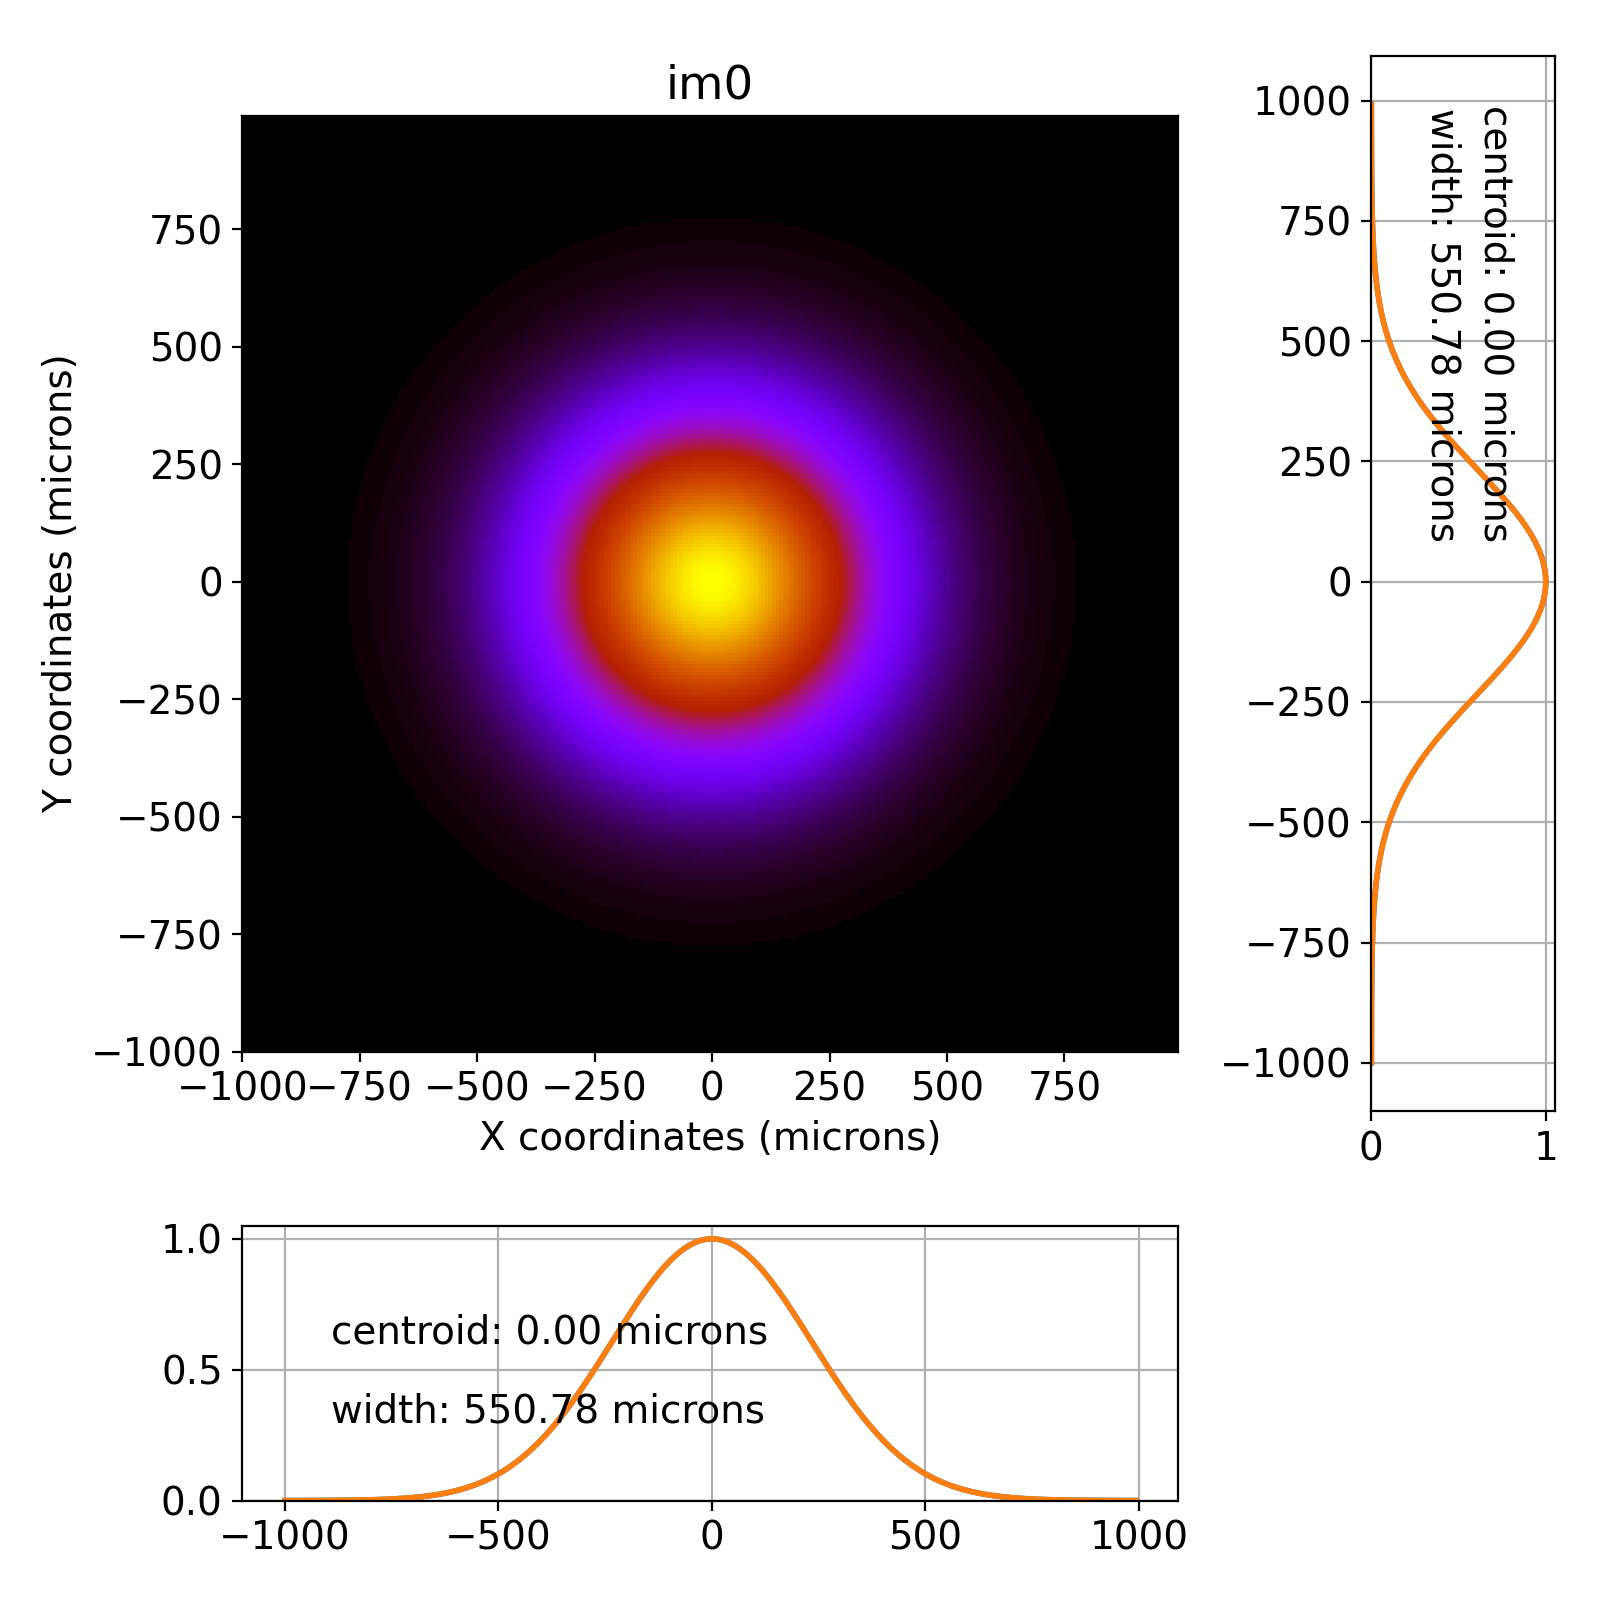

<IPython.core.display.Javascript object>


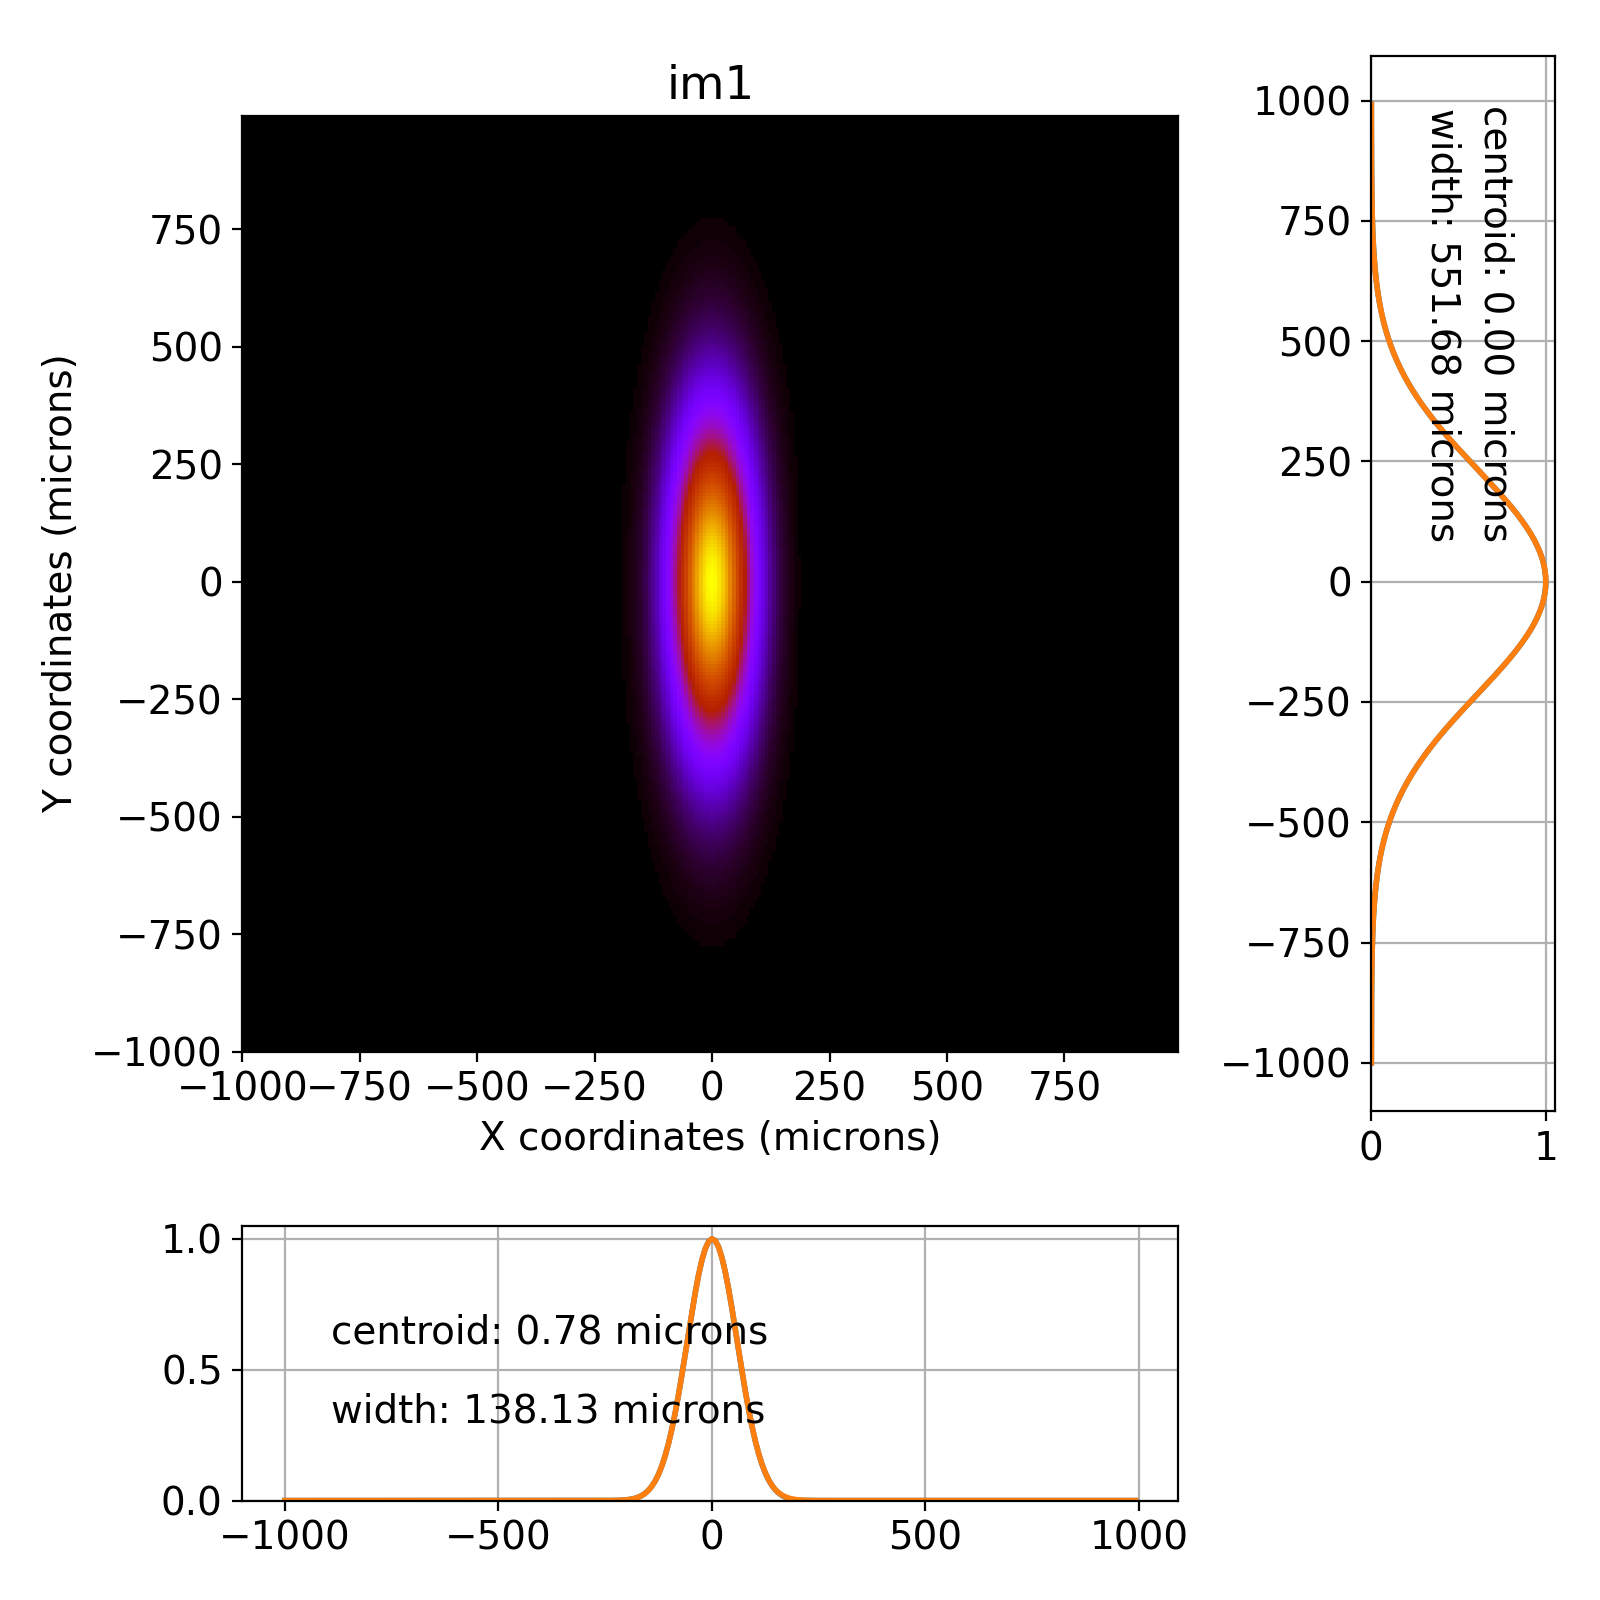

<IPython.core.display.Javascript object>


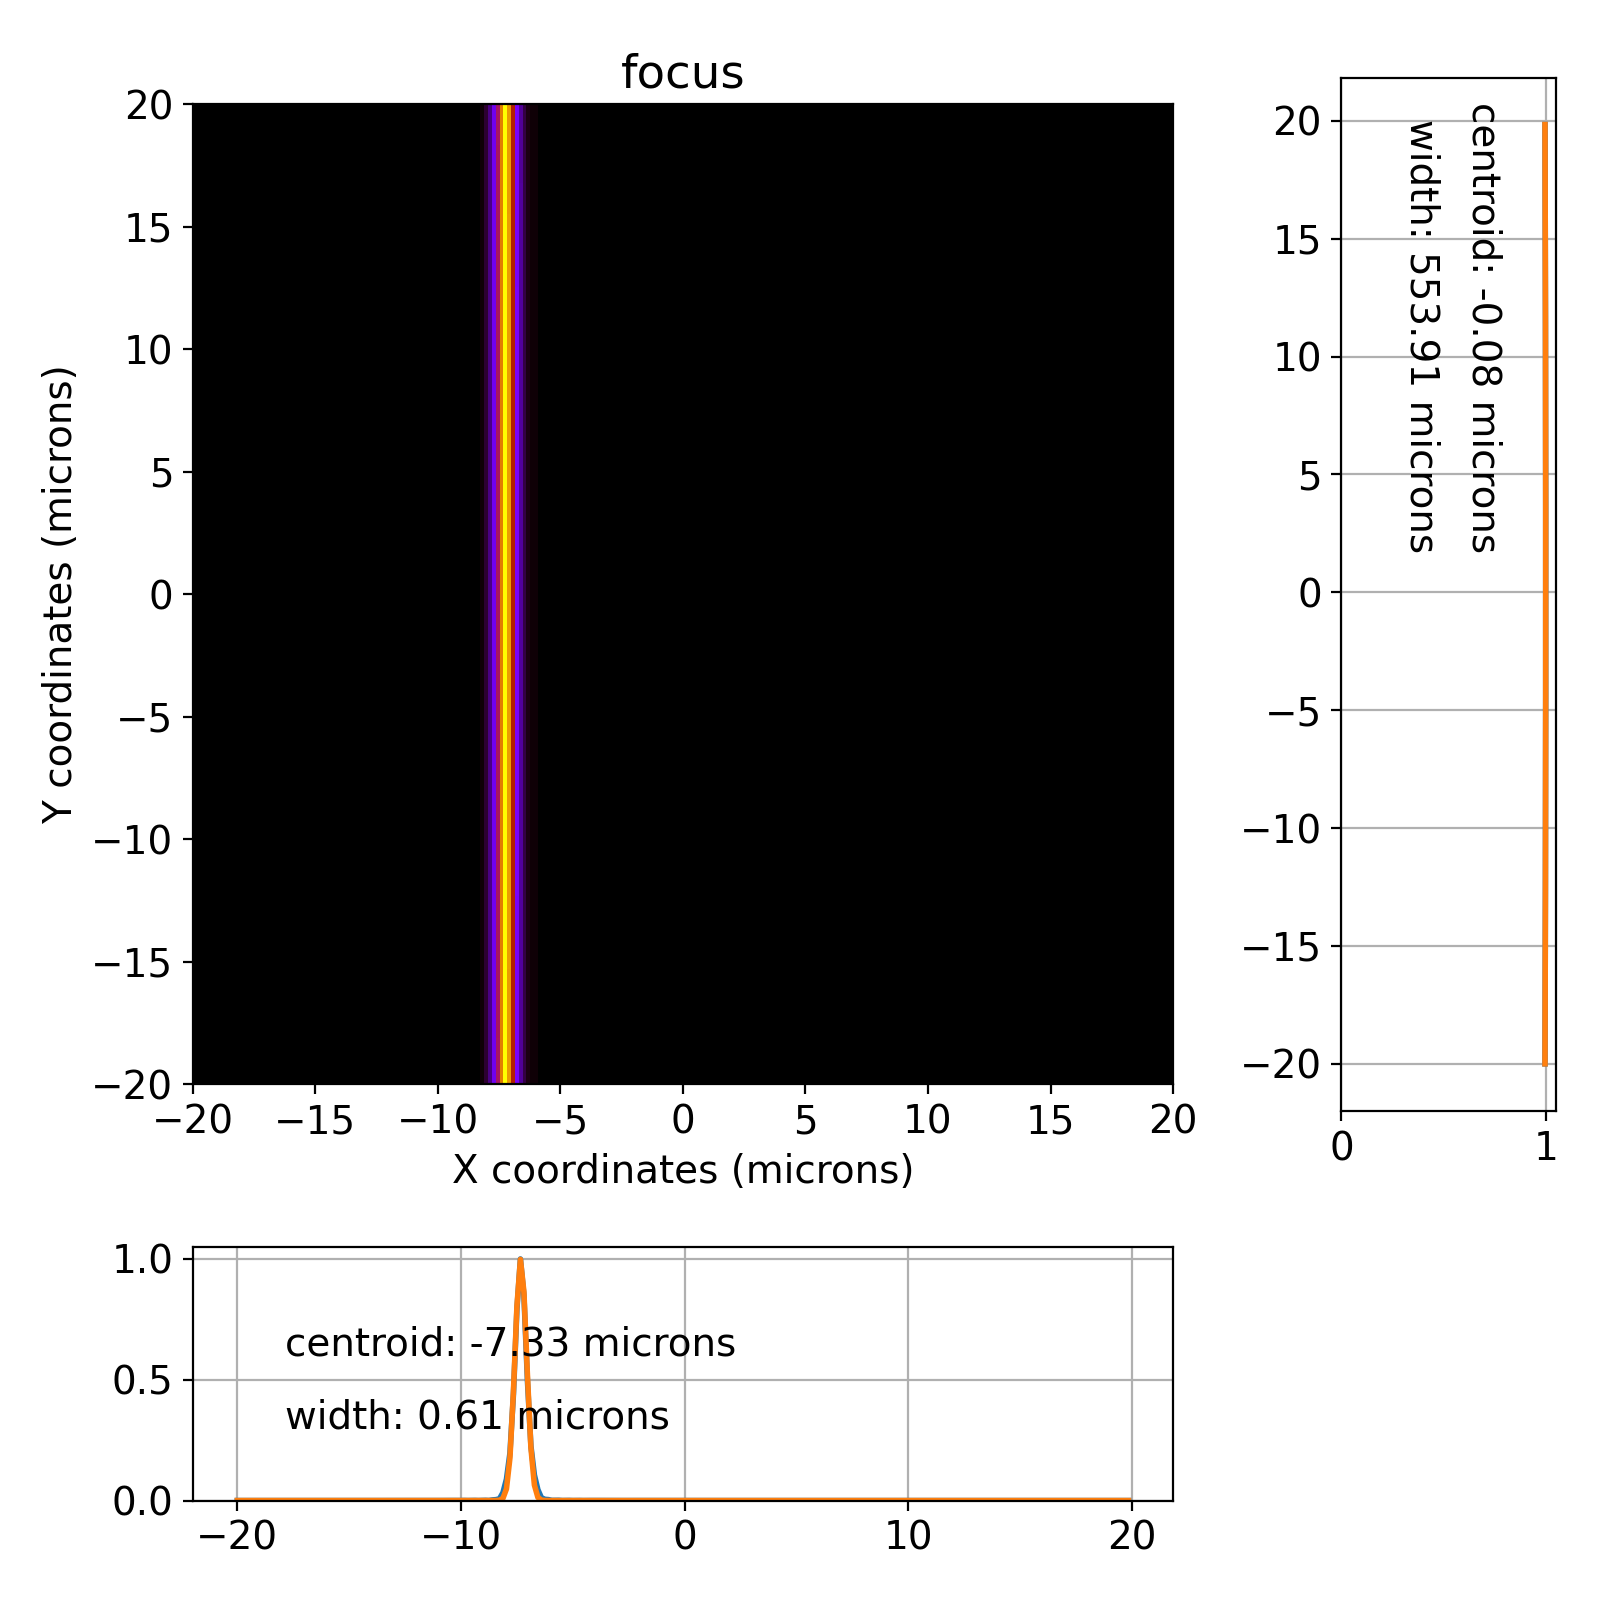

<IPython.core.display.Javascript object>


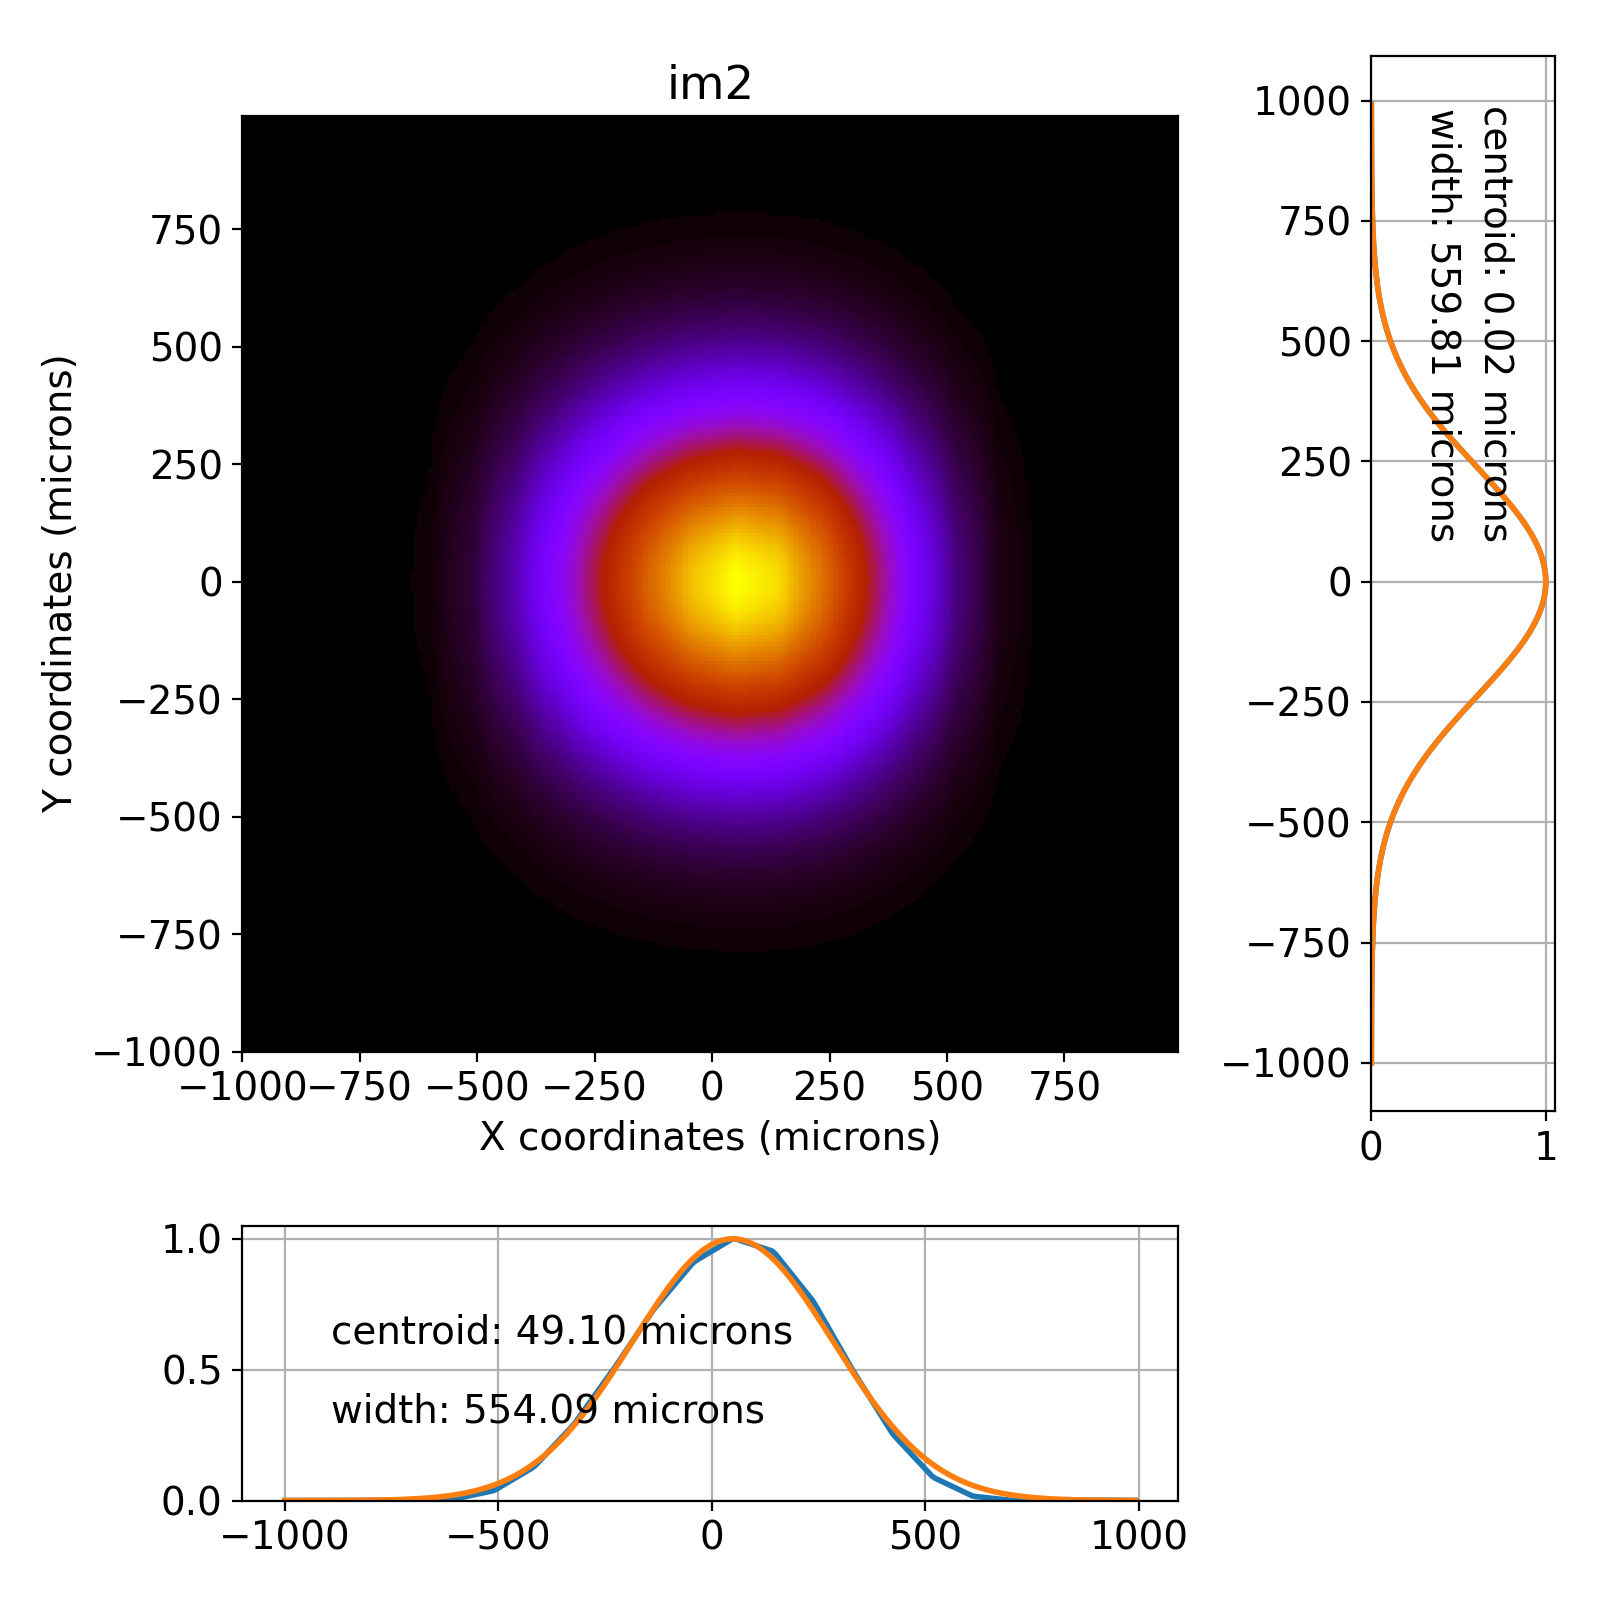

In [34]:
b2 = mono_beamline.propagate_beamline(b1)
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()
# mono_beamline.im2.view_beam()

In [40]:
beam_params['photonEnergy'] = 9000

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

In [41]:
pulse_test.propagate(beamline=mono_beamline, screen_names=['focus','im2'])

FWHM in x: 17.700000336299787 microns
FWHM in y: 17.700000336299787 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.129893362597122
5.129893362597122
x is focused
y is focused
FWHM in x: 551.9970745186539 microns
FWHM in y: 551.9970745186539 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129893362597122
5.129893362597122
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984706
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.034706
zy: 160.160686
azimuth 0.02 mrad
im1
zx: 10.034706
zy: 160.160686
azimuth 0.02 mrad
drift4
delta z: 5211.50
zx: 10.087091
zy: 160.213071
azimuth 0.02 mrad
m1
2441.9954626486815
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.971496
zy: 160.213071
azim

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2899: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2900: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2907: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2913: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2935: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2949

FWHM in x: 17.700000336299475 microns
FWHM in y: 17.700000336299475 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.129895729222622
5.129895729222622
x is focused
y is focused
FWHM in x: 551.9968201222246 microns
FWHM in y: 551.9968201222246 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129895729222622
5.129895729222622
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984777
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.034777
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.034777
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.91
zx: 10.087151
zy: 160.213060
azimuth 0.01 mrad
m1
2430.5703089028084
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.971619
zy: 160.213060
azimu

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.984991
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.034991
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.034991
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.90
zx: 10.087333
zy: 160.213028
azimuth 0.01 mrad
m1
2396.324019190425
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.971988
zy: 160.213028
azimuth 5.88 mrad
drift5
delta z: 10.90
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.025688
zy: 161.210703
azimuth 5.88 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.025688
zy: 161.210703
azimuth 5.88 mrad
drift6
delta z: -201.45
x becomes unfocused
y stays unfocused
zx: 1.069361
zy: 162.254376
azimuth 5.88 mrad
m2
zRx: 1.78e+06
zRy: 4.72e+01
zx: 11568.624675
zy: 162.254376
azimuth -0.12 mrad
drift7
delta z: 204.13
x becomes focused
y stays unfocused
x remains foc

zx: 10.035348
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.035348
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.89
zx: 10.087635
zy: 160.212973
azimuth 0.01 mrad
m1
2339.34396651267
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.972603
zy: 160.212973
azimuth 5.89 mrad
drift5
delta z: 10.89
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.025128
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.025128
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -201.32
x becomes unfocused
y stays unfocused
zx: 1.067793
zy: 162.253369
azimuth 5.89 mrad
m2
zRx: 4.28e+08
zRy: 4.72e+01
zx: -178210.152706
zy: 162.253369
azimuth -0.12 mrad
drift7
delta z: 203.99
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
x remains focused
y stays unfocused


zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.985776
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.035776
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.035776
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.87
zx: 10.087998
zy: 160.212908
azimuth 0.01 mrad
m1
2271.127750439096
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.973340
zy: 160.212908
azimuth 5.89 mrad
drift5
delta z: 10.87
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.024455
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.024455
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -201.15
x becomes unfocused
y stays unfocused
zx: 1.065914
zy: 162.252162
azimuth 5.89 mrad
m2
zRx: 1.09e+06
zRy: 4.72e+01
zx: -8904.672662
zy: 162.252162
azimuth -0.11 mrad
drift7
delta z: 203.82
x becomes focused
y stays unfocused
x remains foc

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.986205
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.036205
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.036205
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.86
zx: 10.088361
zy: 160.212843
azimuth 0.01 mrad
m1
2203.085433944512
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.974078
zy: 160.212843
azimuth 5.89 mrad
drift5
delta z: 10.86
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.023783
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.023783
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -200.99
x becomes unfocused
y stays unfocused
zx: 1.064035
zy: 162.250956
azimuth 5.89 mrad
m2
zRx: 3.02e+05
zRy: 4.72e+01
zx: -4652.523512
zy: 162.250956
az

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.986633
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.036633
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.036633
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -10.84
zx: 10.088724
zy: 160.212778
azimuth 0.01 mrad
m1
2135.216511515547
zRx: 2.84e-02
zRy: 4.72e+01
zx: -0.974816
zy: 160.212778
azimuth 5.89 mrad
drift5
delta z: 10.85
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.023110
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.023110
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -200.83
x becomes unfocused
y stays unfocused
zx: 1.062157
zy: 162.249750
azimuth 5.89 mrad
m2
zRx: 1.45e+05
zRy: 4.72e+01
zx: -3190.729555
zy: 162.249750
azimuth -0.11 mrad
drift7
delta z: 203

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.987061
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.037061
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037061
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -10.83
zx: 10.089087
zy: 160.212713
azimuth 0.00 mrad
m1
2067.520479406867
zRx: 2.85e-02
zRy: 4.72e+01
zx: -0.975553
zy: 160.212713
azimuth 5.89 mrad
drift5
delta z: 10.83
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.022438
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.022438
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -200.66
x becomes unfocused
y stays unfocused
zx: 1.060280
zy: 162.248546
azimuth 5.89 mrad
m2
zRx: 8.71e+04
zRy: 4.72e+01
zx: -2451.091393
zy: 162.248546
azimuth -0.11 mrad
drift7
delta z: 203.31
x becomes focused
y stays unfocused
x remains foc

zx: 0.021765
zy: 161.210703
azimuth 5.89 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.021765
zy: 161.210703
azimuth 5.89 mrad
drift6
delta z: -200.50
x becomes unfocused
y stays unfocused
zx: 1.058404
zy: 162.247342
azimuth 5.89 mrad
m2
zRx: 5.94e+04
zRy: 4.72e+01
zx: -2006.136973
zy: 162.247342
azimuth -0.11 mrad
drift7
delta z: 203.14
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -2006.074067
zy: 162.310248
azimuth -0.11 mrad
c3
zRx: 1.67e+01
zRy: 4.72e+01
x becomes unfocused
zx: -2006.074067
zy: 162.310248
azimuth -443.03 mrad
drift8
delta z: 3.85
zx: -2005.964058
zy: 162.420257
azimuth -443.03 mrad
c4
zRx: 2.67e+02
zRy: 4.72e+01
zx: -32170.194366
zy: 162.420257
azimuth -0.03 mrad
drift9
delta z: -6.11
zx: -32170.093281
zy: 162.521342
azimuth -0.03 mrad
im2
zx: -32170.093281
zy: 162.521342
azimuth 

zx: 1.056529
zy: 162.246140
azimuth 5.90 mrad
m2
zRx: 4.40e+04
zRy: 4.72e+01
zx: -1709.871918
zy: 162.246140
azimuth -0.11 mrad
drift7
delta z: 202.97
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1709.807793
zy: 162.310264
azimuth -0.11 mrad
c3
zRx: 1.66e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1709.807793
zy: 162.310264
azimuth -443.04 mrad
drift8
delta z: 3.84
zx: -1709.697761
zy: 162.420296
azimuth -443.04 mrad
c4
zRx: 2.66e+02
zRy: 4.72e+01
zx: -27417.890943
zy: 162.420296
azimuth -0.03 mrad
drift9
delta z: -6.09
zx: -27417.789895
zy: 162.521345
azimuth -0.03 mrad
im2
zx: -27417.789895
zy: 162.521345
azimuth -0.03 mrad
FWHM in x: 17.700000336285513 microns
FWHM in y: 17.700000336285513 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130002227370125
5.130002227370125
x is focused
y is focused
FWHM in x: 551.9853725259652 microns
FWHM in y: 551.9853725259652 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 

zRx: 1.65e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1562.038908
zy: 162.310275
azimuth -443.04 mrad
drift8
delta z: 3.83
zx: -1561.928861
zy: 162.420322
azimuth -443.04 mrad
c4
zRx: 2.65e+02
zRy: 4.72e+01
zx: -25047.555564
zy: 162.420322
azimuth -0.03 mrad
drift9
delta z: -6.08
zx: -25047.454540
zy: 162.521346
azimuth -0.03 mrad
im2
zx: -25047.454540
zy: 162.521346
azimuth -0.03 mrad
FWHM in x: 17.70000033628427 microns
FWHM in y: 17.70000033628427 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130011693872126
5.130011693872126
x is focused
y is focused
FWHM in x: 551.9843549848672 microns
FWHM in y: 551.9843549848672 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130011693872126
5.130011693872126
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686


zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.988560
zy: 160.110686
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 10.038560
zy: 160.160686
azimuth -0.00 mrad
im1
zx: 10.038560
zy: 160.160686
azimuth -0.00 mrad
drift4
delta z: -10.78
zx: 10.090359
zy: 160.212486
azimuth -0.00 mrad
m1
1831.9386450764005
zRx: 2.85e-02
zRy: 4.72e+01
zx: -0.978134
zy: 160.212486
azimuth 5.90 mrad
drift5
delta z: 10.78
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.020084
zy: 161.210703
azimuth 5.90 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.020084
zy: 161.210703
azimuth 5.90 mrad
drift6
delta z: -200.09
x becomes unfocused
y stays unfocused
zx: 1.053719
zy: 162.244338
azimuth 5.90 mrad
m2
zRx: 3.10e+04
zRy: 4.72e+01
zx: -1415.294011
zy: 162.24433

Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 0.019635
zy: 161.210703
azimuth 5.90 mrad
drift6
delta z: -199.98
x becomes unfocused
y stays unfocused
zx: 1.052470
zy: 162.243538
azimuth 5.90 mrad
m2
zRx: 2.73e+04
zRy: 4.72e+01
zx: -1319.795364
zy: 162.243538
azimuth -0.10 mrad
drift7
delta z: 202.60
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1319.728604
zy: 162.310298
azimuth -0.10 mrad
c3
zRx: 1.64e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1319.728604
zy: 162.310298
azimuth -443.04 mrad
drift8
delta z: 3.81
zx: -1319.618522
zy: 162.420380
azimuth -443.04 mrad
c4
zRx: 2.63e+02
zRy: 4.72e+01
zx: -21160.626409
zy: 162.420380
azimuth -0.03 mrad
drift9
delta z: -6.06
zx: -21160.525439
zy: 162.521349
azimuth -0.03 mrad
im2
zx: -21160.525439
zy: 162.521349
azimuth -0.03 mrad
FWHM in x: 17.700000336281484 microns
FWH

zRx: 2.85e-02
zRy: 4.72e+01
zx: -0.979240
zy: 160.212389
azimuth 5.90 mrad
drift5
delta z: 10.76
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.019075
zy: 161.210703
azimuth 5.90 mrad
focus
zx: 0.019075
zy: 161.210703
azimuth 5.90 mrad
drift6
delta z: -199.84
x becomes unfocused
y stays unfocused
zx: 1.050910
zy: 162.242539
azimuth 5.90 mrad
m2
zRx: 2.38e+04
zRy: 4.72e+01
zx: -1220.988007
zy: 162.242539
azimuth -0.10 mrad
drift7
delta z: 202.46
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1220.920234
zy: 162.310312
azimuth -0.10 mrad
c3
zRx: 1.63e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1220.920234
zy: 162.310312
azimuth -443.04 mrad
drift8
delta z: 3.80
zx: -1220.810134
zy: 162.420412
azimuth -443.04 mrad
c4
zRx: 2.62e+02
zRy: 4.72e+01
zx: -19575.588971
zy: 162.420412
azimuth -0.03 mrad
drift9
delta z: -6.05
zx: -19575.488032
zy: 162.521351
azimuth -0.03 mrad
im2
zx: -19575.488032
zy: 162.521351
azimuth -0.03 mrad
FWHM i

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.989559
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.039559
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.039559
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: -10.75
zx: 10.091208
zy: 160.212335
azimuth -0.01 mrad
m1
1676.0467392168546
zRx: 2.85e-02
zRy: 4.72e+01
zx: -0.979854
zy: 160.212335
azimuth 5.90 mrad
drift5
delta z: 10.75
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.018514
zy: 161.210703
azimuth 5.90 mrad
focus
zx: 0.018514
zy: 161.210703
azimuth 5.90 mrad
drift6
delta z: -199.71
x becomes unfocused
y stays unfocused
zx: 1.049351
zy: 162.241540
azimuth 5.90 mrad
m2
zRx: 2.10e+04
zRy: 4.72e+01
zx: -1139.965234
zy: 162.241540
azimuth -0.10 mrad
drift7
delta z: 202.32
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1139.896450
zy: 162.310325
azimuth -0.10 mrad
c3
zRx: 1.63e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1139.896450
zy: 162.310325
azimuth -443.04 mrad
drif

zRx: 2.59e+02
zRy: 4.72e+01
zx: -17188.183124
zy: 162.420476
azimuth -0.03 mrad
drift9
delta z: -6.02
zx: -17188.082245
zy: 162.521355
azimuth -0.03 mrad
im2
zx: -17188.082245
zy: 162.521355
azimuth -0.03 mrad
FWHM in x: 17.700000336276826 microns
FWHM in y: 17.700000336276826 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130068492884126
5.130068492884126
x is focused
y is focused
FWHM in x: 551.9782498171822 microns
FWHM in y: 551.9782498171822 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130068492884126
5.130068492884126
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.989987
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.039987
zy: 160.160686
azimuth -0.01

zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990344
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040344
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040344
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: -10.72
zx: 10.091874
zy: 160.212217
azimuth -0.01 mrad
m1
1554.2079288359876
zRx: 2.85e-02
zRy: 4.72e+01
zx: -0.981206
zy: 160.212217
azimuth 5.91 mrad
drift5
delta z: 10.73
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.017281
zy: 161.210703
azimuth 5.91 mrad
focus
zx: 0.017281
zy: 161.210703
azimuth 5.91 mrad
drift6
delta z: -199.40
x becomes unfocused
y stays unfocused
zx: 1.045922
zy: 162.239345
azimuth 5.91 mrad
m2
zRx: 1.69e+04
zRy: 4.72e+01
zx: -1004.858953
zy: 162.239345
azimuth -0.10 mrad
drift7
delta z: 202.01
x becomes focused
y stays unfocused
x remai

zx: -15354.047770
zy: 162.521359
azimuth -0.03 mrad
im2
zx: -15354.047770
zy: 162.521359
azimuth -0.03 mrad
FWHM in x: 17.700000336273412 microns
FWHM in y: 17.700000336273412 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130094525764628
5.130094525764628
x is focused
y is focused
FWHM in x: 551.9754516605301 microns
FWHM in y: 551.9754516605301 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130094525764628
5.130094525764628
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.990772
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040772
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040772
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: -10.71
zx: 10.092238
zy: 160

x remains focused
y stays unfocused
zx: -910.181027
zy: 162.310382
azimuth -0.09 mrad
c3
zRx: 1.60e+01
zRy: 4.72e+01
x becomes unfocused
zx: -910.181027
zy: 162.310382
azimuth -443.05 mrad
drift8
delta z: 3.75
zx: -910.070824
zy: 162.420585
azimuth -443.05 mrad
c4
zRx: 2.56e+02
zRy: 4.72e+01
zx: -14590.445473
zy: 162.420585
azimuth -0.03 mrad
drift9
delta z: -5.98
zx: -14590.344696
zy: 162.521362
azimuth -0.03 mrad
im2
zx: -14590.344696
zy: 162.521362
azimuth -0.03 mrad
FWHM in x: 17.700000336271554 microns
FWHM in y: 17.700000336271554 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130108725517628
5.130108725517628
x is focused
y is focused
FWHM in x: 551.9739254052414 microns
FWHM in y: 551.9739254052414 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130108725517628
5.130108725517628
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+

zx: 0.015374
zy: 161.210704
azimuth 5.91 mrad
drift6
delta z: -198.94
x becomes unfocused
y stays unfocused
zx: 1.040630
zy: 162.235959
azimuth 5.91 mrad
m2
zRx: 1.35e+04
zRy: 4.72e+01
zx: -870.395888
zy: 162.235959
azimuth -0.09 mrad
drift7
delta z: 201.53
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -870.321450
zy: 162.310398
azimuth -0.09 mrad
c3
zRx: 1.59e+01
zRy: 4.72e+01
x becomes unfocused
zx: -870.321450
zy: 162.310398
azimuth -443.05 mrad
drift8
delta z: 3.74
zx: -870.211225
zy: 162.420623
azimuth -443.05 mrad
c4
zRx: 2.54e+02
zRy: 4.72e+01
zx: -13950.877140
zy: 162.420623
azimuth -0.03 mrad
drift9
delta z: -5.96
zx: -13950.776399
zy: 162.521364
azimuth -0.03 mrad
im2
zx: -13950.776399
zy: 162.521364
azimuth -0.03 mrad
FWHM in x: 17.700000336269692 microns
FWHM in y: 17.700000336269692 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130122925270629
5.130122925270629
x is focused
y is focused
FWHM in x: 551.9723991584

zRx: 2.53e+02
zRy: 4.72e+01
zx: -13497.720980
zy: 162.420655
azimuth -0.03 mrad
drift9
delta z: -5.95
zx: -13497.620269
zy: 162.521366
azimuth -0.03 mrad
im2
zx: -13497.620269
zy: 162.521366
azimuth -0.03 mrad
FWHM in x: 17.700000336268136 microns
FWHM in y: 17.700000336268136 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130134758398128
5.130134758398128
x is focused
y is focused
FWHM in x: 551.9711272925005 microns
FWHM in y: 551.9711272925005 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130134758398128
5.130134758398128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.991985
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.041985
zy: 160.160686
azimuth -0.02

zRx: 2.52e+02
zRy: 4.72e+01
zx: -13033.595163
zy: 162.420692
azimuth -0.03 mrad
drift9
delta z: -5.93
zx: -13033.494488
zy: 162.521368
azimuth -0.03 mrad
im2
zx: -13033.494488
zy: 162.521368
azimuth -0.03 mrad
FWHM in x: 17.700000336266278 microns
FWHM in y: 17.700000336266278 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130148958151128
5.130148958151128
x is focused
y is focused
FWHM in x: 551.9696010611628 microns
FWHM in y: 551.9696010611628 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130148958151128
5.130148958151128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992413
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.042413
zy: 160.160686
azimuth -0.02

zx: -12643.869060
zy: 162.521370
azimuth -0.03 mrad
FWHM in x: 17.700000336264416 microns
FWHM in y: 17.700000336264416 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.13016315790413
5.13016315790413
x is focused
y is focused
FWHM in x: 551.9680748382784 microns
FWHM in y: 551.9680748382784 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13016315790413
5.13016315790413
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.992841
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.042841
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.042841
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: -10.64
zx: 10.093998
zy: 160.211843
azimuth -0.02 mrad
m1
1170.2945125301112
zRx: 2.86e-

zRx: 1.14e+04
zRy: 4.72e+01
zx: -768.707764
zy: 162.231391
azimuth -0.09 mrad
drift7
delta z: 200.88
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -768.628698
zy: 162.310457
azimuth -0.09 mrad
c3
zRx: 1.56e+01
zRy: 4.72e+01
x becomes unfocused
zx: -768.628698
zy: 162.310457
azimuth -443.06 mrad
drift8
delta z: 3.70
zx: -768.518387
zy: 162.420768
azimuth -443.06 mrad
c4
zRx: 2.49e+02
zRy: 4.72e+01
zx: -12318.759500
zy: 162.420768
azimuth -0.03 mrad
drift9
delta z: -5.90
zx: -12318.658895
zy: 162.521372
azimuth -0.03 mrad
im2
zx: -12318.658895
zy: 162.521372
azimuth -0.03 mrad
FWHM in x: 17.70000033626255 microns
FWHM in y: 17.70000033626255 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.13017735765713
5.13017735765713
x is focused
y is focused
FWHM in x: 551.9665486238472 microns
FWHM in y: 551.9665486238472 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13017735765713
5.13017735765713
im0
zx: 159.900000

zx: 0.012122
zy: 161.210704
azimuth 5.92 mrad
drift6
delta z: -198.15
x becomes unfocused
y stays unfocused
zx: 1.031621
zy: 162.230202
azimuth 5.92 mrad
m2
zRx: 1.11e+04
zRy: 4.72e+01
zx: -752.074660
zy: 162.230202
azimuth -0.08 mrad
drift7
delta z: 200.71
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -751.994390
zy: 162.310472
azimuth -0.08 mrad
c3
zRx: 1.55e+01
zRy: 4.72e+01
x becomes unfocused
zx: -751.994390
zy: 162.310472
azimuth -443.06 mrad
drift8
delta z: 3.69
zx: -751.884057
zy: 162.420805
azimuth -443.06 mrad
c4
zRx: 2.48e+02
zRy: 4.72e+01
zx: -12051.654257
zy: 162.420805
azimuth -0.03 mrad
drift9
delta z: -5.88
zx: -12051.553688
zy: 162.521375
azimuth -0.03 mrad
im2
zx: -12051.553688
zy: 162.521375
azimuth -0.03 mrad
FWHM in x: 17.700000336260693 microns
FWHM in y: 17.700000336260693 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.13019155741013
5.13019155741013
x is focused
y is focused
FWHM in x: 551.965022417869

x remains focused
y stays unfocused
zx: 0.011449
zy: 161.210704
azimuth 5.92 mrad
focus
zx: 0.011449
zy: 161.210704
azimuth 5.92 mrad
drift6
delta z: -197.98
x becomes unfocused
y stays unfocused
zx: 1.029759
zy: 162.229014
azimuth 5.92 mrad
m2
zRx: 1.09e+04
zRy: 4.72e+01
zx: -738.599467
zy: 162.229014
azimuth -0.08 mrad
drift7
delta z: 200.54
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -738.517993
zy: 162.310488
azimuth -0.08 mrad
c3
zRx: 1.54e+01
zRy: 4.72e+01
x becomes unfocused
zx: -738.517993
zy: 162.310488
azimuth -443.06 mrad
drift8
delta z: 3.68
zx: -738.407637
zy: 162.420843
azimuth -443.06 mrad
c4
zRx: 2.47e+02
zRy: 4.72e+01
zx: -11835.182486
zy: 162.420843
azimuth -0.03 mrad
drift9
delta z: -5.87
zx: -11835.081952
zy: 162.521377
azimuth -0.03 mrad
im2
zx: -11835.081952
zy: 162.521377
azimuth -0.03 mrad
FWHM in x: 17.700000336258828 microns
FWHM in y: 17.700000336258828 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad

FWHM in x: 17.70000033625728 microns
FWHM in y: 17.70000033625728 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.1302175902906315
5.1302175902906315
x is focused
y is focused
FWHM in x: 551.9622243955303 microns
FWHM in y: 551.9622243955303 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1302175902906315
5.1302175902906315
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.994483
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.044483
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.044483
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: -10.59
zx: 10.095395
zy: 160.211599
azimuth -0.03 mrad
m1
921.0860117723516
zRx: 2.86e-02
zRy: 4.72e+01
zx: -0.988329
zy: 160.211599
a

x remains focused
y stays unfocused
zx: 0.010215
zy: 161.210704
azimuth 5.92 mrad
focus
zx: 0.010215
zy: 161.210704
azimuth 5.92 mrad
drift6
delta z: -197.68
x becomes unfocused
y stays unfocused
zx: 1.026349
zy: 162.226838
azimuth 5.92 mrad
m2
zRx: 1.09e+04
zRy: 4.72e+01
zx: -721.157284
zy: 162.226838
azimuth -0.08 mrad
drift7
delta z: 200.23
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -721.073606
zy: 162.310516
azimuth -0.08 mrad
c3
zRx: 1.53e+01
zRy: 4.72e+01
x becomes unfocused
zx: -721.073606
zy: 162.310516
azimuth -443.06 mrad
drift8
delta z: 3.66
zx: -720.963211
zy: 162.420911
azimuth -443.06 mrad
c4
zRx: 2.45e+02
zRy: 4.72e+01
zx: -11554.747971
zy: 162.420911
azimuth -0.03 mrad
drift9
delta z: -5.84
zx: -11554.647501
zy: 162.521381
azimuth -0.03 mrad
im2
zx: -11554.647501
zy: 162.521381
azimuth -0.03 mrad
FWHM in x: 17.70000033625542 microns
FWHM in y: 17.70000033625542 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5

zx: 0.009654
zy: 161.210704
azimuth 5.92 mrad
drift6
delta z: -197.54
x becomes unfocused
y stays unfocused
zx: 1.024800
zy: 162.225850
azimuth 5.92 mrad
m2
zRx: 1.09e+04
zRy: 4.72e+01
zx: -716.050276
zy: 162.225850
azimuth -0.08 mrad
drift7
delta z: 200.08
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -715.965598
zy: 162.310529
azimuth -0.08 mrad
c3
zRx: 1.52e+01
zRy: 4.72e+01
x becomes unfocused
zx: -715.965598
zy: 162.310529
azimuth -443.06 mrad
drift8
delta z: 3.65
zx: -715.855184
zy: 162.420942
azimuth -443.06 mrad
c4
zRx: 2.44e+02
zRy: 4.72e+01
zx: -11472.502876
zy: 162.420942
azimuth -0.03 mrad
drift9
delta z: -5.83
zx: -11472.402436
zy: 162.521383
azimuth -0.03 mrad
im2
zx: -11472.402436
zy: 162.521383
azimuth -0.03 mrad
FWHM in x: 17.700000336253865 microns
FWHM in y: 17.700000336253865 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130243623171132
5.130243623171132
x is focused
y is focused
FWHM in x: 551.9594264016

zRx: 1.10e+04
zRy: 4.72e+01
zx: -712.745197
zy: 162.224863
azimuth -0.08 mrad
drift7
delta z: 199.94
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -712.659519
zy: 162.310541
azimuth -0.08 mrad
c3
zRx: 1.52e+01
zRy: 4.72e+01
x becomes unfocused
zx: -712.659519
zy: 162.310541
azimuth -443.07 mrad
drift8
delta z: 3.64
zx: -712.549087
zy: 162.420973
azimuth -443.07 mrad
c4
zRx: 2.42e+02
zRy: 4.72e+01
zx: -11419.139093
zy: 162.420973
azimuth -0.03 mrad
drift9
delta z: -5.81
zx: -11419.038681
zy: 162.521385
azimuth -0.03 mrad
im2
zx: -11419.038681
zy: 162.521385
azimuth -0.03 mrad
FWHM in x: 17.700000336252316 microns
FWHM in y: 17.700000336252316 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130255456298633
5.130255456298633
x is focused
y is focused
FWHM in x: 551.9581545955728 microns
FWHM in y: 551.9581545955728 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130255456298633
5.130255456298633
im0
zx: 159.

zRx: 1.51e+01
zRy: 4.72e+01
x becomes unfocused
zx: -710.915893
zy: 162.310554
azimuth -443.07 mrad
drift8
delta z: 3.63
zx: -710.805443
zy: 162.421004
azimuth -443.07 mrad
c4
zRx: 2.41e+02
zRy: 4.72e+01
zx: -11390.815822
zy: 162.421004
azimuth -0.03 mrad
drift9
delta z: -5.80
zx: -11390.715439
zy: 162.521386
azimuth -0.03 mrad
im2
zx: -11390.715439
zy: 162.521386
azimuth -0.03 mrad
FWHM in x: 17.700000336250767 microns
FWHM in y: 17.700000336250767 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130267289426132
5.130267289426132
x is focused
y is focused
FWHM in x: 551.9568827954131 microns
FWHM in y: 551.9568827954131 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130267289426132
5.130267289426132
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686


zx: 10.046338
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -10.53
zx: 10.096976
zy: 160.211324
azimuth -0.04 mrad
m1
642.2717984447838
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.991520
zy: 160.211324
azimuth 5.93 mrad
drift5
delta z: 10.53
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.007859
zy: 161.210704
azimuth 5.93 mrad
focus
zx: 0.007859
zy: 161.210704
azimuth 5.93 mrad
drift6
delta z: -197.11
x becomes unfocused
y stays unfocused
zx: 1.019848
zy: 162.222693
azimuth 5.93 mrad
m2
zRx: 1.14e+04
zRy: 4.72e+01
zx: -711.236286
zy: 162.222693
azimuth -0.07 mrad
drift7
delta z: 199.63
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -711.148410
zy: 162.310569
azimuth -0.07 mrad
c3
zRx: 1.50e+01
zRy: 4.72e+01
x becomes unfocused
zx: -711.148410
zy: 162.310569
azimuth -443.07 mrad
drift8
delta z: 3.62
zx: -711.037938
zy: 162.421041
azimuth -443.07 mrad
c4
zRx: 2.40e+02
zRy: 4.72e+01
zx: -11394.083569
zy: 162.421041
azimuth -0.03 mrad


zRx: 1.18e+04
zRy: 4.72e+01
zx: -713.770135
zy: 162.221511
azimuth -0.07 mrad
drift7
delta z: 199.46
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -713.681062
zy: 162.310584
azimuth -0.07 mrad
c3
zRx: 1.49e+01
zRy: 4.72e+01
x becomes unfocused
zx: -713.681062
zy: 162.310584
azimuth -443.07 mrad
drift8
delta z: 3.61
zx: -713.570569
zy: 162.421078
azimuth -443.07 mrad
c4
zRx: 2.39e+02
zRy: 4.72e+01
zx: -11434.205875
zy: 162.421078
azimuth -0.03 mrad
drift9
delta z: -5.77
zx: -11434.105562
zy: 162.521391
azimuth -0.03 mrad
im2
zx: -11434.105562
zy: 162.521391
azimuth -0.03 mrad
FWHM in x: 17.70000033624704 microns
FWHM in y: 17.70000033624704 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130295688932133
5.130295688932133
x is focused
y is focused
FWHM in x: 551.9538304989787 microns
FWHM in y: 551.9538304989787 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130295688932133
5.130295688932133
im0
zx: 159.90

zx: 10.047194
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -10.50
zx: 10.097706
zy: 160.211198
azimuth -0.04 mrad
m1
514.6161388515076
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.992993
zy: 160.211198
azimuth 5.93 mrad
drift5
delta z: 10.51
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.006513
zy: 161.210704
azimuth 5.93 mrad
focus
zx: 0.006513
zy: 161.210704
azimuth 5.93 mrad
drift6
delta z: -196.78
x becomes unfocused
y stays unfocused
zx: 1.016139
zy: 162.220330
azimuth 5.93 mrad
m2
zRx: 1.22e+04
zRy: 4.72e+01
zx: -718.716369
zy: 162.220330
azimuth -0.07 mrad
drift7
delta z: 199.29
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -718.626099
zy: 162.310599
azimuth -0.07 mrad
c3
zRx: 1.49e+01
zRy: 4.72e+01
x becomes unfocused
zx: -718.626099
zy: 162.310599
azimuth -443.07 mrad
drift8
delta z: 3.59
zx: -718.515584
zy: 162.421115
azimuth -443.07 mrad
c4
zRx: 2.38e+02
zRy: 4.72e+01
zx: -11512.976901
zy: 162.421115
azimuth -0.03 mrad


zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.997622
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.047622
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.047622
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -10.49
zx: 10.098071
zy: 160.211135
azimuth -0.04 mrad
m1
451.0300360334983
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.993729
zy: 160.211135
azimuth 5.93 mrad
drift5
delta z: 10.49
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.005839
zy: 161.210704
azimuth 5.93 mrad
focus
zx: 0.005839
zy: 161.210704
azimuth 5.93 mrad
drift6
delta z: -196.61
x becomes unfocused
y stays unfocused
zx: 1.014286
zy: 162.219150
azimuth 5.93 mrad
m2
zRx: 1.28e+04
zRy: 4.72e+01
zx: -726.325843
zy: 162.219150
azi

FWHM in x: 551.9495064702395 microns
FWHM in y: 551.9495064702395 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130335921565635
5.130335921565635
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998050
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.048050
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.048050
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: -10.48
zx: 10.098437
zy: 160.211072
azimuth -0.04 mrad
m1
387.60446892464023
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.994465
zy: 160.211072
azimuth 5.94 mrad
drift5
delta z: 10.48
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.005166
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.005166
zy: 161.210704
azimuth 5.94 mra

zx: -11974.177256
zy: 162.521399
azimuth -0.03 mrad
FWHM in x: 17.700000336239906 microns
FWHM in y: 17.700000336239906 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130350121318635
5.130350121318635
x is focused
y is focused
FWHM in x: 551.9479803586496 microns
FWHM in y: 551.9479803586496 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130350121318635
5.130350121318635
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.998479
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.048479
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.048479
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -10.46
zx: 10.098802
zy: 160.211009
azimuth -0.05 mrad
m1
324.3389778766618
zRx: 2.8

zx: 10.048907
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.048907
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -10.45
zx: 10.099167
zy: 160.210947
azimuth -0.05 mrad
m1
261.2331046744532
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.995938
zy: 160.210947
azimuth 5.94 mrad
drift5
delta z: 10.45
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.003819
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.003819
zy: 161.210704
azimuth 5.94 mrad
drift6
delta z: -196.12
x becomes unfocused
y stays unfocused
zx: 1.008731
zy: 162.215615
azimuth 5.94 mrad
m2
zRx: 1.53e+04
zRy: 4.72e+01
zx: -766.681714
zy: 162.215615
azimuth -0.06 mrad
drift7
delta z: 198.61
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -766.586670
zy: 162.310659
azimuth -0.06 mrad
c3
zRx: 1.46e+01
zRy: 4.72e+01
x becomes unfocused
zx: -766.586670
zy: 162.310659
azimuth -443.08 mrad
drift8
delta z: 3.55
zx: -766.476069
zy: 162.421260
azimuth -443.08 

FWHM in x: 17.700000336236187 microns
FWHM in y: 17.700000336236187 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130378520824635
5.130378520824635
x is focused
y is focused
FWHM in x: 551.9449281608265 microns
FWHM in y: 551.9449281608265 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130378520824635
5.130378520824635
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.999335
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.049335
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.049335
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -10.44
zx: 10.099533
zy: 160.210884
azimuth -0.05 mrad
m1
198.28639278894576
zRx: 2.87e-02
zRy: 4.72e+01
zx: -0.996674
zy: 160.210884
az

zRx: 2.94e+00
zRy: 4.72e+01
zx: 9.999763
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.049763
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.049763
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -10.42
zx: 10.099898
zy: 160.210821
azimuth -0.05 mrad
m1
135.49838711319836
zRx: 2.88e-02
zRy: 4.72e+01
zx: -0.997410
zy: 160.210821
azimuth 5.94 mrad
drift5
delta z: 10.43
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.002473
zy: 161.210704
azimuth 5.94 mrad
focus
zx: 0.002473
zy: 161.210704
azimuth 5.94 mrad
drift6
delta z: -195.79
x becomes unfocused
y stays unfocused
zx: 1.005033
zy: 162.213264
azimuth 5.94 mrad
m2
zRx: 1.80e+04
zRy: 4.72e+01
zx: -811.984731
zy: 162.213264
azimuth -0.06 mrad
drift7
delta z: 198.27
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -811.887305
zy: 162.310689
azimuth -0.06 mrad
c3
zRx: 1.44e+01
zRy: 4.72e+01
x becomes unfocused
zx: -811.887305
zy: 162.310689
azimuth -443.08 mrad
drift8


zx: 1.003186
zy: 162.212090
azimuth 5.94 mrad
m2
zRx: 1.98e+04
zRy: 4.72e+01
zx: -841.860260
zy: 162.212090
azimuth -0.06 mrad
drift7
delta z: 198.10
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -841.761646
zy: 162.310704
azimuth -0.06 mrad
c3
zRx: 1.43e+01
zRy: 4.72e+01
x becomes unfocused
zx: -841.761646
zy: 162.310704
azimuth -443.08 mrad
drift8
delta z: 3.51
zx: -841.650982
zy: 162.421369
azimuth -443.08 mrad
c4
zRx: 2.29e+02
zRy: 4.72e+01
zx: -13482.101877
zy: 162.421369
azimuth -0.03 mrad
drift9
delta z: -5.63
zx: -13482.001837
zy: 162.521408
azimuth -0.03 mrad
im2
zx: -13482.001837
zy: 162.521408
azimuth -0.03 mrad
FWHM in x: 17.700000336232154 microns
FWHM in y: 17.700000336232154 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130409286956137
5.130409286956137
x is focused
y is focused
FWHM in x: 551.9416216513363 microns
FWHM in y: 551.9416216513363 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad

FWHM in x: 551.9400955834155 microns
FWHM in y: 551.9400955834155 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130423486709137
5.130423486709137
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.000691
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: -10.40
zx: 10.100691
zy: 160.210686
azimuth -0.05 mrad
m1
0.0
zRx: 2.88e-02
zRy: 4.72e+01
zx: -0.999004
zy: 160.210686
azimuth 5.95 mrad
drift5
delta z: 10.40
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.001014
zy: 161.210704
azimuth 5.95 mrad
focus
zx: 0.001014
zy: 161.210704
azimuth 5.95 mrad
drift6
delta

zRx: 2.88e-02
zRy: 4.72e+01
zx: -0.999740
zy: 160.210624
azimuth 5.95 mrad
drift5
delta z: 10.38
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000340
zy: 161.210704
azimuth 5.95 mrad
focus
zx: 0.000340
zy: 161.210704
azimuth 5.95 mrad
drift6
delta z: -195.27
x becomes unfocused
y stays unfocused
zx: 0.999186
zy: 162.209549
azimuth 5.95 mrad
m2
zRx: 2.55e+04
zRy: 4.72e+01
zx: -929.776784
zy: 162.209549
azimuth -0.05 mrad
drift7
delta z: 197.73
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -929.675597
zy: 162.310736
azimuth -0.05 mrad
c3
zRx: 1.42e+01
zRy: 4.72e+01
x becomes unfocused
zx: -929.675597
zy: 162.310736
azimuth -443.09 mrad
drift8
delta z: 3.49
zx: -929.564887
zy: 162.421446
azimuth -443.09 mrad
c4
zRx: 2.27e+02
zRy: 4.72e+01
zx: -14888.997450
zy: 162.421446
azimuth -0.03 mrad
drift9
delta z: -5.60
zx: -14888.897483
zy: 162.521412
azimuth -0.03 mrad
im2
zx: -14888.897483
zy: 162.

zx: -974.268854
zy: 162.421476
azimuth -443.09 mrad
c4
zRx: 2.26e+02
zRy: 4.72e+01
zx: -15604.473873
zy: 162.421476
azimuth -0.03 mrad
drift9
delta z: -5.58
zx: -15604.373935
zy: 162.521414
azimuth -0.03 mrad
im2
zx: -15604.373935
zy: 162.521414
azimuth -0.03 mrad
FWHM in x: 17.700000336226566 microns
FWHM in y: 17.700000336226566 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.1304518862151385
5.1304518862151385
x is focused
y is focused
FWHM in x: 551.9370434729295 microns
FWHM in y: 551.9370434729295 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1304518862151385
5.1304518862151385
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.001547
zy: 160.110686
azimuth -0.06 mrad
dri

zRx: 2.88e-02
zRy: 4.72e+01
zx: -1.001211
zy: 160.210499
azimuth 5.95 mrad
drift5
delta z: 10.36
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.001007
zy: 161.210704
azimuth 5.95 mrad
focus
zx: -0.001007
zy: 161.210704
azimuth 5.95 mrad
drift6
delta z: -194.94
x becomes unfocused
y stays unfocused
zx: 0.995497
zy: 162.207208
azimuth 5.95 mrad
m2
zRx: 3.44e+04
zRy: 4.72e+01
zx: -1051.577974
zy: 162.207208
azimuth -0.05 mrad
drift7
delta z: 197.39
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1051.474417
zy: 162.310766
azimuth -0.05 mrad
c3
zRx: 1.40e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1051.474417
zy: 162.310766
azimuth -443.09 mrad
drift8
delta z: 3.46
zx: -1051.363665
zy: 162.421517
azimuth -443.09 mrad
c4
zRx: 2.24e+02
zRy: 4.72e+01
zx: -16838.429019
zy: 162.421517
azimuth -0.03 mrad
drift9
delta z: -5.56
zx: -16838.329120
zy: 162.521417
azimuth -0.03 mrad
im2
zx: -16838.329120
zy

FWHM in x: 17.700000336222537 microns
FWHM in y: 17.700000336222537 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.13048265234664
5.13048265234664
x is focused
y is focused
FWHM in x: 551.9337370580533 microns
FWHM in y: 551.9337370580533 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13048265234664
5.13048265234664
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.002474
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.052474
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.052474
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: -10.34
zx: 10.102215
zy: 160.210427
azimuth -0.06 mrad
m1
-258.5025927695492
zRx: 2.88e-02
zRy: 4.72e+01
zx: -1.002070
zy: 160.210427
azimu

zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.002974
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.052974
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.052974
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: -10.33
zx: 10.102642
zy: 160.210355
azimuth -0.06 mrad
m1
-330.3984186512413
zRx: 2.88e-02
zRy: 4.72e+01
zx: -1.002928
zy: 160.210355
azimuth 5.95 mrad
drift5
delta z: 10.33
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.002579
zy: 161.210704
azimuth 5.95 mrad
focus
zx: -0.002579
zy: 161.210704
azimuth 5.95 mrad
drift6
delta z: -194.56
x becomes unfocused
y stays unfocused
zx: 0.991199
zy: 162.204482
azimuth 5.95 mrad
m2
zRx: 5.44e+04
zRy: 4.72e+01
zx: -1282.960309
zy: 162.204482
azimuth -0.04 mrad
drift7
delta z: 196.99
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1282.853992
zy: 162.310800
azimuth -0.04 mrad
c3
zRx: 1.39e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1282.853992
zy: 162.310800
azimuth -443.10 mrad
d

zRx: 6.99e+04
zRy: 4.72e+01
zx: -1434.111577
zy: 162.203315
azimuth -0.04 mrad
drift7
delta z: 196.82
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1434.004078
zy: 162.310814
azimuth -0.04 mrad
c3
zRx: 1.38e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1434.004078
zy: 162.310814
azimuth -443.10 mrad
drift8
delta z: 3.42
zx: -1433.893257
zy: 162.421635
azimuth -443.10 mrad
c4
zRx: 2.21e+02
zRy: 4.72e+01
zx: -22961.631483
zy: 162.421635
azimuth -0.03 mrad
drift9
delta z: -5.51
zx: -22961.531694
zy: 162.521424
azimuth -0.03 mrad
im2
zx: -22961.531694
zy: 162.521424
azimuth -0.03 mrad
FWHM in x: 17.700000336218192 microns
FWHM in y: 17.700000336218192 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.13051578510364
5.13051578510364
x is focused
y is focused
FWHM in x: 551.9301763479422 microns
FWHM in y: 551.9301763479422 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13051578510364
5.13051578510364
im0
zx: 159.

zRx: 2.19e+02
zRy: 4.72e+01
zx: -26254.976192
zy: 162.421670
azimuth -0.03 mrad
drift9
delta z: -5.49
zx: -26254.876436
zy: 162.521426
azimuth -0.03 mrad
im2
zx: -26254.876436
zy: 162.521426
azimuth -0.03 mrad
FWHM in x: 17.700000336216334 microns
FWHM in y: 17.700000336216334 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130529984856641
5.130529984856641
x is focused
y is focused
FWHM in x: 551.9286503434088 microns
FWHM in y: 551.9286503434088 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130529984856641
5.130529984856641
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.003901
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053901
zy: 160.160686
azimuth -0.0

zRx: 2.89e-02
zRy: 4.72e+01
zx: -1.005257
zy: 160.210159
azimuth 5.96 mrad
drift5
delta z: 10.29
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.004712
zy: 161.210704
azimuth 5.96 mrad
focus
zx: -0.004712
zy: 161.210704
azimuth 5.96 mrad
drift6
delta z: -194.04
x becomes unfocused
y stays unfocused
zx: 0.985375
zy: 162.200791
azimuth 5.96 mrad
m2
zRx: 1.44e+05
zRy: 4.72e+01
zx: -1994.839082
zy: 162.200791
azimuth -0.04 mrad
drift7
delta z: 196.45
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1994.729027
zy: 162.310846
azimuth -0.04 mrad
c3
zRx: 1.36e+01
zRy: 4.72e+01
x becomes unfocused
zx: -1994.729026
zy: 162.310846
azimuth -443.10 mrad
drift8
delta z: 3.40
zx: -1994.618162
zy: 162.421711
azimuth -443.10 mrad
c4
zRx: 2.18e+02
zRy: 4.72e+01
zx: -31937.756245
zy: 162.421711
azimuth -0.03 mrad
drift9
delta z: -5.47
zx: -31937.656527
zy: 162.521428
azimuth -0.03 mrad
im2
zx: -31937.656527
zy

zx: -39778.757641
zy: 162.521430
azimuth -0.03 mrad
FWHM in x: 17.7000003362123 microns
FWHM in y: 17.7000003362123 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130560750988142
5.130560750988142
x is focused
y is focused
FWHM in x: 551.9253440292459 microns
FWHM in y: 551.9253440292459 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130560750988142
5.130560750988142
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.004829
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.054829
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.054829
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: -10.27
zx: 10.104230
zy: 160.210087
azimuth -0.07 mrad
m1
-595.5996961540181
zRx: 2.89e

zRx: 2.89e-02
zRy: 4.72e+01
zx: -1.006851
zy: 160.210025
azimuth 5.96 mrad
drift5
delta z: 10.26
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.006172
zy: 161.210704
azimuth 5.96 mrad
focus
zx: -0.006172
zy: 161.210704
azimuth 5.96 mrad
drift6
delta z: -193.68
x becomes unfocused
y stays unfocused
zx: 0.981395
zy: 162.198271
azimuth 5.96 mrad
m2
zRx: 4.89e+05
zRy: 4.72e+01
zx: -3568.198311
zy: 162.198271
azimuth -0.03 mrad
drift7
delta z: 196.08
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -3568.085705
zy: 162.310877
azimuth -0.03 mrad
c3
zRx: 1.35e+01
zRy: 4.72e+01
x becomes unfocused
zx: -3568.085706
zy: 162.310877
azimuth -443.11 mrad
drift8
delta z: 3.37
zx: -3567.974797
zy: 162.421786
azimuth -443.11 mrad
c4
zRx: 2.16e+02
zRy: 4.72e+01
zx: -57124.800347
zy: 162.421786
azimuth -0.03 mrad
drift9
delta z: -5.43
zx: -57124.700700
zy: 162.521433
azimuth -0.03 mrad
im2
zx: -57124.700700
zy: 162.521433
azimuth -0.03 mrad
FWHM

zRx: 1.34e+01
zRy: 4.72e+01
x becomes unfocused
zx: -5895.530737
zy: 162.310892
azimuth -443.11 mrad
drift8
delta z: 3.36
zx: -5895.419808
zy: 162.421820
azimuth -443.11 mrad
c4
zRx: 2.15e+02
zRy: 4.72e+01
zx: -94383.974423
zy: 162.421820
azimuth -0.03 mrad
drift9
delta z: -5.41
zx: -94383.874809
zy: 162.521435
azimuth -0.03 mrad
im2
zx: -94383.874809
zy: 162.521435
azimuth -0.03 mrad
FWHM in x: 17.70000033620827 microns
FWHM in y: 17.70000033620827 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130591517119642
5.130591517119642
x is focused
y is focused
FWHM in x: 551.9220377547568 microns
FWHM in y: 551.9220377547568 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130591517119642
5.130591517119642
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686


zRx: 2.13e+02
zRy: 4.72e+01
zx: -298840.502822
zy: 162.421855
azimuth -0.03 mrad
drift9
delta z: -5.40
zx: -298840.403240
zy: 162.521437
azimuth -0.03 mrad
im2
zx: -298840.403240
zy: 162.521437
azimuth -0.03 mrad
FWHM in x: 17.700000336206408 microns
FWHM in y: 17.700000336206408 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130605716872643
5.130605716872643
x is focused
y is focused
FWHM in x: 551.9205117952965 microns
FWHM in y: 551.9205117952965 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130605716872643
5.130605716872643
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.006185
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.056185
zy: 160.160686
azimuth -

zx: 10.056613
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.056613
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: -10.21
zx: 10.105757
zy: 160.209831
azimuth -0.08 mrad
m1
-847.8910594862754
zRx: 2.89e-02
zRy: 4.72e+01
zx: -1.009179
zy: 160.209831
azimuth 5.97 mrad
drift5
delta z: 10.22
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.008306
zy: 161.210704
azimuth 5.97 mrad
focus
zx: -0.008306
zy: 161.210704
azimuth 5.97 mrad
drift6
delta z: -193.16
x becomes unfocused
y stays unfocused
zx: 0.975586
zy: 162.194596
azimuth 5.97 mrad
m2
zRx: 5.35e+06
zRy: 4.72e+01
zx: 11271.718880
zy: 162.194596
azimuth -0.03 mrad
drift7
delta z: 195.54
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 11271.835206
zy: 162.310923
azimuth -0.03 mrad
c3
zRx: 1.33e+01
zRy: 4.72e+01
x becomes unfocused
zx: 11271.835206
zy: 162.310923
azimuth -443.11 mrad
drift8
delta z: 3.33
zx: 11271.946179
zy: 162.421895
azimuth -443.11 mrad
c4
zRx: 2.13e+02
zRy: 4.

zx: -0.008980
zy: 161.210704
azimuth 5.97 mrad
drift6
delta z: -193.00
x becomes unfocused
y stays unfocused
zx: 0.973754
zy: 162.193438
azimuth 5.97 mrad
m2
zRx: 9.25e+05
zRy: 4.72e+01
zx: 4613.959377
zy: 162.193438
azimuth -0.03 mrad
drift7
delta z: 195.37
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 4614.076876
zy: 162.310937
azimuth -0.03 mrad
c3
zRx: 1.32e+01
zRy: 4.72e+01
x becomes unfocused
zx: 4614.076878
zy: 162.310937
azimuth -443.12 mrad
drift8
delta z: 3.32
zx: 4614.187870
zy: 162.421929
azimuth -443.12 mrad
c4
zRx: 2.11e+02
zRy: 4.72e+01
zx: 73861.269400
zy: 162.421929
azimuth -0.03 mrad
drift9
delta z: -5.36
zx: 73861.368912
zy: 162.521441
azimuth -0.03 mrad
im2
zx: 73861.368912
zy: 162.521441
azimuth -0.03 mrad
FWHM in x: 17.700000336202375 microns
FWHM in y: 17.700000336202375 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130636483004145
5.130636483004145
x is focused
y is focused
FWHM in x: 551.917205578790

zRx: 2.10e+02
zRy: 4.72e+01
zx: 45719.218318
zy: 162.421963
azimuth -0.03 mrad
drift9
delta z: -5.34
zx: 45719.317798
zy: 162.521443
azimuth -0.03 mrad
im2
zx: 45719.317798
zy: 162.521443
azimuth -0.03 mrad
FWHM in x: 17.700000336200517 microns
FWHM in y: 17.700000336200517 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130650682757144
5.130650682757144
x is focused
y is focused
FWHM in x: 551.9156796460917 microns
FWHM in y: 551.9156796460917 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130650682757144
5.130650682757144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.007540
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.057540
zy: 160.160686
azimuth -0.08 m

zx: 0.970092
zy: 162.191124
azimuth 5.97 mrad
m2
zRx: 1.93e+05
zRy: 4.72e+01
zx: 2043.645511
zy: 162.191124
azimuth -0.02 mrad
drift7
delta z: 195.03
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 2043.765353
zy: 162.310965
azimuth -0.02 mrad
c3
zRx: 1.30e+01
zRy: 4.72e+01
x becomes unfocused
zx: 2043.765353
zy: 162.310965
azimuth -443.12 mrad
drift8
delta z: 3.30
zx: 2043.876385
zy: 162.421997
azimuth -443.12 mrad
c4
zRx: 2.09e+02
zRy: 4.72e+01
zx: 32714.211875
zy: 162.421997
azimuth -0.03 mrad
drift9
delta z: -5.32
zx: 32714.311322
zy: 162.521445
azimuth -0.03 mrad
im2
zx: 32714.311322
zy: 162.521445
azimuth -0.03 mrad
FWHM in x: 17.700000336198652 microns
FWHM in y: 17.700000336198652 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.1306648825101435
5.1306648825101435
x is focused
y is focused
FWHM in x: 551.9141537218436 microns
FWHM in y: 551.9141537218436 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad


zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.008396
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.058396
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.058396
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: -10.16
zx: 10.107286
zy: 160.209576
azimuth -0.09 mrad
m1
-1097.55735761266
zRx: 2.90e-02
zRy: 4.72e+01
zx: -1.012242
zy: 160.209576
azimuth 5.98 mrad
drift5
delta z: 10.16
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.011114
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.011114
zy: 161.210704
azimuth 5.98 mrad
drift6
delta z: -192.48
x becomes unfocused
y stays unfocused
zx: 0.967958
zy: 162.189776
azimuth 5.98 mrad
m2
zRx: 1.11e+05
zRy: 4.72e+01
zx: 1518.211200
zy: 162.189776
azimuth -0.02 mrad
drift7
delta z: 194.83
x becomes focused
y stays u

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.94e+00
zRy: 4.72e+01
zx: 10.008824
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.058824
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.058824
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: -10.15
zx: 10.107654
zy: 160.209515
azimuth -0.09 mrad
m1
-1157.0900915661541
zRx: 2.90e-02
zRy: 4.72e+01
zx: -1.012977
zy: 160.209515
azimuth 5.98 mrad
drift5
delta z: 10.15
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.011788
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.011788
zy: 161.210704
azimuth 5.98 mrad
drift6
delta z: -192.31
x becomes unfocused
y stays unfocused
zx: 0.966129
zy: 162.188622
azimuth 5.98 mrad
m2
zRx: 7.55e+04
zRy: 4.72e+01
zx: 1234.302221
zy: 162.188622
azimuth -0.02 mrad
drift7
delta z: 194.66
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 1234.424595
zy: 162.310996
azimuth -0.02 mrad
c3
zRx: 1.29e+01
zRy: 4.72e+01
x becomes unfocused
zx

zx: 10.059252
zy: 160.160686
azimuth -0.09 mrad
drift4
delta z: -10.14
zx: 10.108021
zy: 160.209454
azimuth -0.09 mrad
m1
-1216.4738205115684
zRx: 2.90e-02
zRy: 4.72e+01
zx: -1.013712
zy: 160.209454
azimuth 5.98 mrad
drift5
delta z: 10.14
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.012462
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.012462
zy: 161.210704
azimuth 5.98 mrad
drift6
delta z: -192.15
x becomes unfocused
y stays unfocused
zx: 0.964302
zy: 162.187468
azimuth 5.98 mrad
m2
zRx: 5.47e+04
zRy: 4.72e+01
zx: 1033.932785
zy: 162.187468
azimuth -0.02 mrad
drift7
delta z: 194.49
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 1034.056327
zy: 162.311010
azimuth -0.02 mrad
c3
zRx: 1.28e+01
zRy: 4.72e+01
x becomes unfocused
zx: 1034.056327
zy: 162.311010
azimuth -443.13 mrad
drift8
delta z: 3.26
zx: 1034.167421
zy: 162.422104
azimuth -443.13 mrad
c4
zRx: 2.06e+02
zRy: 4.72e+01
zx: 16550.42

zx: -0.013136
zy: 161.210704
azimuth 5.98 mrad
drift6
delta z: -191.99
x becomes unfocused
y stays unfocused
zx: 0.962476
zy: 162.186316
azimuth 5.98 mrad
m2
zRx: 4.14e+04
zRy: 4.72e+01
zx: 884.886593
zy: 162.186316
azimuth -0.01 mrad
drift7
delta z: 194.32
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 885.011301
zy: 162.311024
azimuth -0.01 mrad
c3
zRx: 1.28e+01
zRy: 4.72e+01
x becomes unfocused
zx: 885.011301
zy: 162.311024
azimuth -443.13 mrad
drift8
delta z: 3.25
zx: 885.122415
zy: 162.422138
azimuth -443.13 mrad
c4
zRx: 2.05e+02
zRy: 4.72e+01
zx: 14164.503368
zy: 162.422138
azimuth -0.03 mrad
drift9
delta z: -5.25
zx: 14164.602684
zy: 162.521453
azimuth -0.03 mrad
im2
zx: 14164.602684
zy: 162.521453
azimuth -0.03 mrad
FWHM in x: 17.700000336190897 microns
FWHM in y: 17.700000336190897 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130724048147647
5.130724048147647
x is focused
y is focused
FWHM in x: 551.9077957951037 mi

zx: 12327.364235
zy: 162.521455
azimuth -0.03 mrad
FWHM in x: 17.70000033618904 microns
FWHM in y: 17.70000033618904 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130738247900646
5.130738247900646
x is focused
y is focused
FWHM in x: 551.9062699145167 microns
FWHM in y: 551.9062699145167 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130738247900646
5.130738247900646
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.010180
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.060180
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.060180
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: -10.11
zx: 10.108817
zy: 160.209323
azimuth -0.10 mrad
m1
-1344.629399618988
zRx: 2.90

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.014597
zy: 161.210704
azimuth 5.98 mrad
focus
zx: -0.014597
zy: 161.210704
azimuth 5.98 mrad
drift6
delta z: -191.63
x becomes unfocused
y stays unfocused
zx: 0.958522
zy: 162.183823
azimuth 5.98 mrad
m2
zRx: 2.52e+04
zRy: 4.72e+01
zx: 665.458828
zy: 162.183823
azimuth -0.01 mrad
drift7
delta z: 193.95
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 665.586059
zy: 162.311054
azimuth -0.01 mrad
c3
zRx: 1.26e+01
zRy: 4.72e+01
x becomes unfocused
zx: 665.586059
zy: 162.311054
azimuth -443.13 mrad
drift8
delta z: 3.22
zx: 665.697215
zy: 162.422210
azimuth -443.13 mrad
c4
zRx: 2.02e+02
zRy: 4.72e+01
zx: 10651.984157
zy: 162.422210
azimuth -0.03 mrad
drift9
delta z: -5.21
zx: 10652.083404
zy: 162.521458
azimuth -0.03 mrad
im2
zx: 10652.083404
zy: 162.521458
azimuth -0.03 mrad
FWHM in x: 17.700000336186864 microns
FWHM in y: 17.700000336186864 microns
FWHM Divergence (x): 17700.0 μrad
FW

x remains focused
y stays unfocused
zx: 593.946674
zy: 162.311068
azimuth -0.01 mrad
c3
zRx: 1.26e+01
zRy: 4.72e+01
x becomes unfocused
zx: 593.946674
zy: 162.311068
azimuth -443.13 mrad
drift8
delta z: 3.20
zx: 594.057849
zy: 162.422243
azimuth -443.13 mrad
c4
zRx: 2.01e+02
zRy: 4.72e+01
zx: 9505.214910
zy: 162.422243
azimuth -0.03 mrad
drift9
delta z: -5.19
zx: 9505.314126
zy: 162.521460
azimuth -0.03 mrad
im2
zx: 9505.314126
zy: 162.521460
azimuth -0.03 mrad
FWHM in x: 17.70000033618501 microns
FWHM in y: 17.70000033618501 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130769014032147
5.130769014032147
x is focused
y is focused
FWHM in x: 551.9029638689004 microns
FWHM in y: 551.9029638689004 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130769014032147
5.130769014032147
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.011535
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.061535
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.061535
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: -10.07
zx: 10.109981
zy: 160.209131
azimuth -0.10 mrad
m1
-1530.6878220078315
zRx: 2.91e-02
zRy: 4.72e+01
zx: -1.017631
zy: 160.209131
azimuth 5.99 mrad
drift5
delta z: 10.07
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.016058
zy: 161.210704
azimuth 5.99 mrad
focus
zx: -0.016058
zy: 161.210704
azimuth 5.99 mrad
drift6
delta z: -191.28
x becomes unfocused
y stays unfocused
zx: 0.954572
zy: 162.181334
azimuth 5.99 mrad
m2
zRx: 1.70e+04
zRy: 4.72e+01
zx: 525.475211
zy: 162.181334

zRx: 2.91e-02
zRy: 4.72e+01
zx: -1.018365
zy: 160.209071
azimuth 5.99 mrad
drift5
delta z: 10.06
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.016732
zy: 161.210704
azimuth 5.99 mrad
focus
zx: -0.016732
zy: 161.210704
azimuth 5.99 mrad
drift6
delta z: -191.11
x becomes unfocused
y stays unfocused
zx: 0.952751
zy: 162.180187
azimuth 5.99 mrad
m2
zRx: 1.45e+04
zRy: 4.72e+01
zx: 476.850619
zy: 162.180187
azimuth -0.00 mrad
drift7
delta z: 193.41
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 476.981530
zy: 162.311098
azimuth -0.00 mrad
c3
zRx: 1.24e+01
zRy: 4.72e+01
x becomes unfocused
zx: 476.981530
zy: 162.311098
azimuth -443.14 mrad
drift8
delta z: 3.18
zx: 477.092747
zy: 162.422315
azimuth -443.14 mrad
c4
zRx: 1.99e+02
zRy: 4.72e+01
zx: 7632.927163
zy: 162.422315
azimuth -0.03 mrad
drift9
delta z: -5.15
zx: 7633.026312
zy: 162.521464
azimuth -0.03 mrad
im2
zx: 7633.026312
zy: 162.521464
a

zRx: 1.24e+01
zRy: 4.72e+01
x becomes unfocused
zx: 435.412570
zy: 162.311112
azimuth -443.14 mrad
drift8
delta z: 3.16
zx: 435.523806
zy: 162.422347
azimuth -443.14 mrad
c4
zRx: 1.98e+02
zRy: 4.72e+01
zx: 6967.537765
zy: 162.422347
azimuth -0.03 mrad
drift9
delta z: -5.13
zx: 6967.636883
zy: 162.521466
azimuth -0.03 mrad
im2
zx: 6967.636883
zy: 162.521466
azimuth -0.03 mrad
FWHM in x: 17.700000336179112 microns
FWHM in y: 17.700000336179112 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130813979916649
5.130813979916649
x is focused
y is focused
FWHM in x: 551.8981320274335 microns
FWHM in y: 551.8981320274335 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130813979916649
5.130813979916649
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.012891
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.062891
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.062891
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: -10.03
zx: 10.111145
zy: 160.208940
azimuth -0.11 mrad
m1
-1715.278532271976
zRx: 2.91e-02
zRy: 4.72e+01
zx: -1.019957
zy: 160.208940
azimuth 5.99 mrad
drift5
delta z: 10.03
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.018193
zy: 161.210704
azimuth 5.99 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.018193
zy: 161.210704
azimuth 5.99 mrad
drift6
delta z: -190.76
x becomes unfocused
y stays 

zx: 5816.677502
zy: 162.521470
azimuth -0.03 mrad
im2
zx: 5816.677502
zy: 162.521470
azimuth -0.03 mrad
FWHM in x: 17.70000033617508 microns
FWHM in y: 17.70000033617508 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130844746048151
5.130844746048151
x is focused
y is focused
FWHM in x: 551.8948260794623 microns
FWHM in y: 551.8948260794623 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130844746048151
5.130844746048151
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.013390
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.063390
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.063390
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: -10.01
zx: 10.111574
zy: 160.2088

zx: 0.945172
zy: 162.175418
azimuth 6.00 mrad
m2
zRx: 8.47e+03
zRy: 4.72e+01
zx: 336.550001
zy: 162.175418
azimuth 0.01 mrad
drift7
delta z: 192.70
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 336.685739
zy: 162.311155
azimuth 0.01 mrad
c3
zRx: 1.22e+01
zRy: 4.72e+01
x becomes unfocused
zx: 336.685739
zy: 162.311155
azimuth -443.15 mrad
drift8
delta z: 3.12
zx: 336.797034
zy: 162.422450
azimuth -443.15 mrad
c4
zRx: 1.95e+02
zRy: 4.72e+01
zx: 5387.272580
zy: 162.422450
azimuth -0.03 mrad
drift9
delta z: -5.08
zx: 5387.371601
zy: 162.521472
azimuth -0.03 mrad
im2
zx: 5387.371601
zy: 162.521472
azimuth -0.03 mrad
FWHM in x: 17.70000033617322 microns
FWHM in y: 17.70000033617322 microns
FWHM Divergence (x): 17700.0 μrad
FWHM Divergence (y): 17700.0 μrad
5.130858945801151
5.130858945801151
x is focused
y is focused
FWHM in x: 551.8933002707007 microns
FWHM in y: 551.8933002707007 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13085894580

zRx: 2.91e-02
zRy: 4.72e+01
zx: -1.022038
zy: 160.208770
azimuth 6.00 mrad
drift5
delta z: 9.99
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.020104
zy: 161.210704
azimuth 6.00 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.020104
zy: 161.210704
azimuth 6.00 mrad
drift6
delta z: -190.29
x becomes unfocused
y stays unfocused
zx: 0.943658
zy: 162.174466
azimuth 6.00 mrad
m2
zRx: 7.74e+03
zRy: 4.72e+01
zx: 316.557861
zy: 162.174466
azimuth 0.01 mrad
drift7
delta z: 192.56
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 316.694561
zy: 162.311166
azimuth 0.01 mrad
c3
zRx: 1.21e+01
zRy: 4.72e+01
x becomes unfocused
zx: 316.694561
zy: 162.311166
azimuth -443.15 mrad
drift8
delta z: 3.11
zx: 316.805872
zy: 162.422477
azimuth -443.15 mrad
c4
zRx: 1.94e+02
zRy: 4.72e+01
zx: 5067.29

FWHM in x: 551.890757274875 microns
FWHM in y: 551.890757274875 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130882612056152
5.130882612056152
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.014532
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.064532
zy: 160.160686
azimuth -0.12 mrad
im1
zx: 10.064532
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: -9.98
zx: 10.112556
zy: 160.208710
azimuth -0.12 mrad
m1
-1936.7853724786737
zRx: 2.91e-02
zRy: 4.72e+01
zx: -1.022772
zy: 160.208710
azimuth 6.00 mrad
drift5
delta z: 9.98
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.020779
zy: 161.210704
azimuth 6.00 mrad
focus
Some of the data contained NaNs or options we

zRx: 2.92e-02
zRy: 4.72e+01
zx: -1.023384
zy: 160.208660
azimuth 6.00 mrad
drift5
delta z: 9.97
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.021341
zy: 161.210704
azimuth 6.00 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.021341
zy: 161.210704
azimuth 6.00 mrad
drift6
delta z: -189.99
x becomes unfocused
y stays unfocused
zx: 0.940330
zy: 162.172375
azimuth 6.00 mrad
m2
zRx: 6.47e+03
zRy: 4.72e+01
zx: 278.797726
zy: 162.172375
azimuth 0.01 mrad
drift7
delta z: 192.25
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 278.936542
zy: 162.311191
azimuth 0.01 mrad
c3
zRx: 1.20e+01
zRy: 4.72e+01
x becomes unfocused
zx: 278.936542
zy: 162.311191
azimuth -443.15 mrad
drift8
delta z: 3.09
zx: 279.047887
zy: 162.422536
azimuth -443.15 mrad
c4
zRx

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 4.72e+01
zRy: 4.72e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.015316
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.065316
zy: 160.160686
azimuth -0.12 mrad
im1
zx: 10.065316
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: -9.96
zx: 10.113231
zy: 160.208601
azimuth -0.12 mrad
m1
-2041.9765777486407
zRx: 2.92e-02
zRy: 4.72e+01
zx: -1.024119
zy: 160.208601
azimuth 6.00 mrad
drift5
delta z: 9.96
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.022015
zy: 161.210704
azimuth 6.00 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.022015
zy: 161.210704
azimuth 6.00 mrad
drift6
delta z: -

zRx: 2.92e-02
zRy: 4.72e+01
zx: -1.024853
zy: 160.208541
azimuth 6.00 mrad
drift5
delta z: 9.95
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.022690
zy: 161.210704
azimuth 6.00 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.022690
zy: 161.210704
azimuth 6.00 mrad
drift6
delta z: -189.67
x becomes unfocused
y stays unfocused
zx: 0.936703
zy: 162.170097
azimuth 6.00 mrad
m2
zRx: 5.45e+03
zRy: 4.72e+01
zx: 245.242322
zy: 162.170097
azimuth 0.02 mrad
drift7
delta z: 191.91
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 245.383443
zy: 162.311218
azimuth 0.02 mrad
c3
zRx: 1.19e+01
zRy: 4.72e+01
x becomes unfocused
zx: 245.383443
zy: 162.311218
azimuth -443.16 mrad
drift8
delta z: 3.06
zx: 245.494825
zy: 162.422600
azimuth -443.16 mrad
c4
zRx: 1.90e+02
zRy: 4.72e+01
zx: 3925.93

zRx: 2.95e+00
zRy: 4.72e+01
zx: 10.016173
zy: 160.110686
azimuth -0.12 mrad
drift3
delta z: 0.00
zx: 10.066173
zy: 160.160686
azimuth -0.12 mrad
im1
zx: 10.066173
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: -9.93
zx: 10.113968
zy: 160.208481
azimuth -0.12 mrad
m1
-2156.183412554346
zRx: 2.92e-02
zRy: 4.72e+01
zx: -1.025587
zy: 160.208481
azimuth 6.01 mrad
drift5
delta z: 9.93
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.023364
zy: 161.210704
azimuth 6.01 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.023364
zy: 161.210704
azimuth 6.01 mrad
drift6
delta z: -189.50
x becomes unfocused
y stays unfocused
zx: 0.934891
zy: 162.168960
azimuth 6.01 mrad
m2
zRx: 5.04e+03
zRy: 4.72e+01
zx: 230.801667
zy: 162.168960
azimuth 0.02 mrad
drift7
delta z: 191.74
x becomes f

x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -0.024039
zy: 161.210704
azimuth 6.01 mrad
focus
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: -0.024039
zy: 161.210704
azimuth 6.01 mrad
drift6
delta z: -189.34
x becomes unfocused
y stays unfocused
zx: 0.933080
zy: 162.167823
azimuth 6.01 mrad
m2
zRx: 4.69e+03
zRy: 4.72e+01
zx: 217.677202
zy: 162.167823
azimuth 0.02 mrad
drift7
delta z: 191.57
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 217.820624
zy: 162.311245
azimuth 0.02 mrad
c3
zRx: 1.17e+01
zRy: 4.72e+01
x becomes unfocused
zx: 217.820624
zy: 162.311245
azimuth -443.16 mrad
drift8
delta z: 3.04
zx: 217.932043
zy: 162.422664
azimuth -443.16 mrad
c4
zRx: 1.88e+02
zRy: 4.72e+01
zx: 3484.801541
zy: 162.422664
azimuth -0.03 mrad
drift9
delta z: -4.95
zx: 3484.900362
zy: 162.521484
azim

<IPython.core.display.Javascript object>


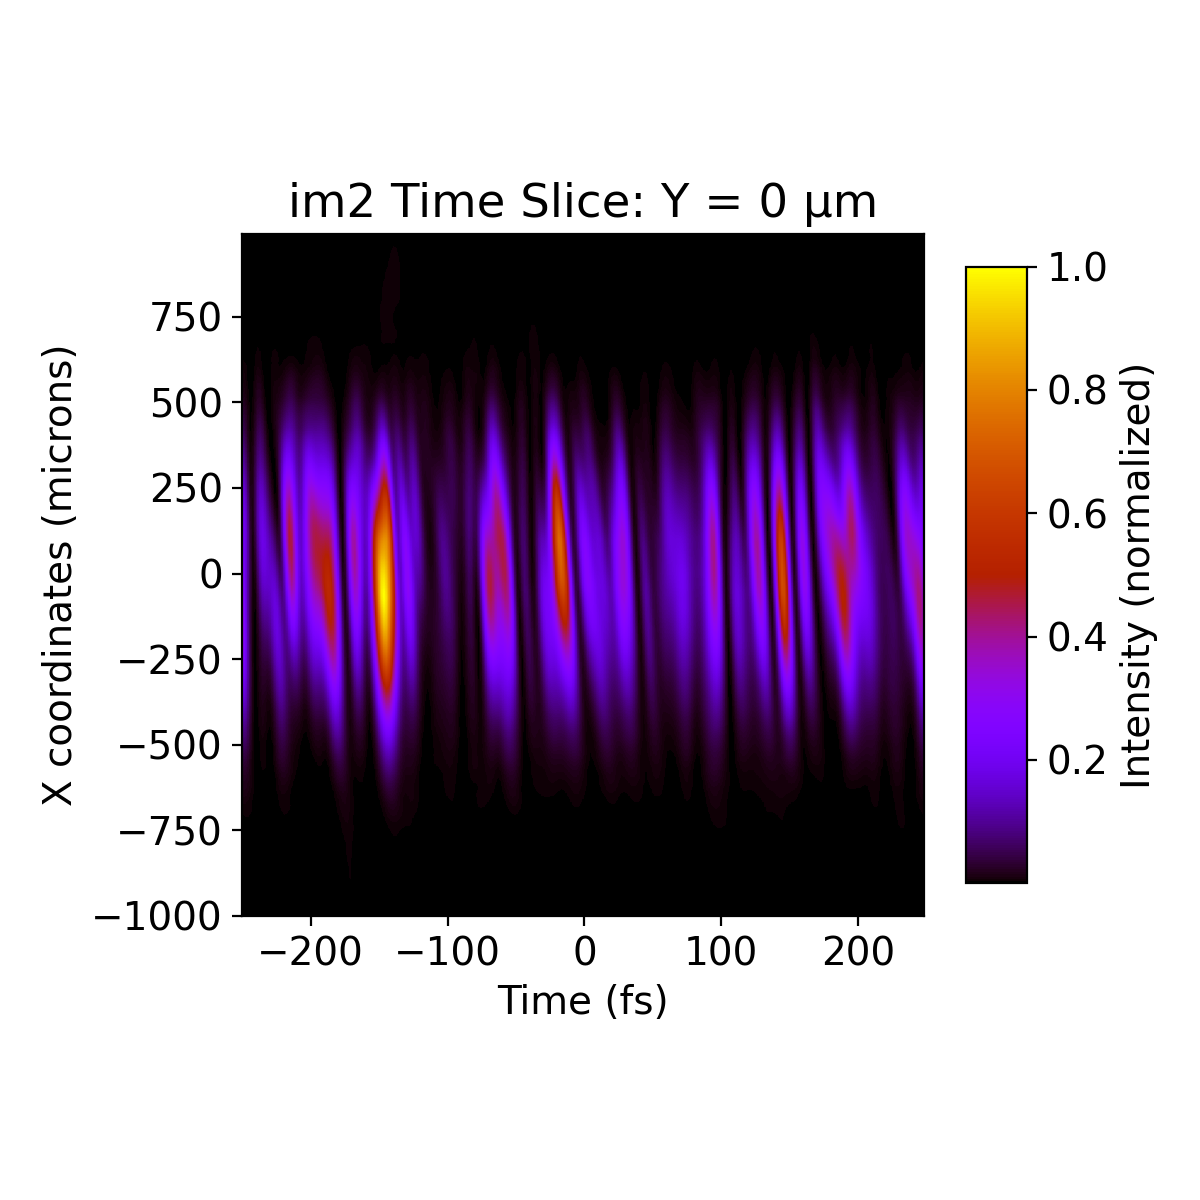

128


<IPython.core.display.Javascript object>


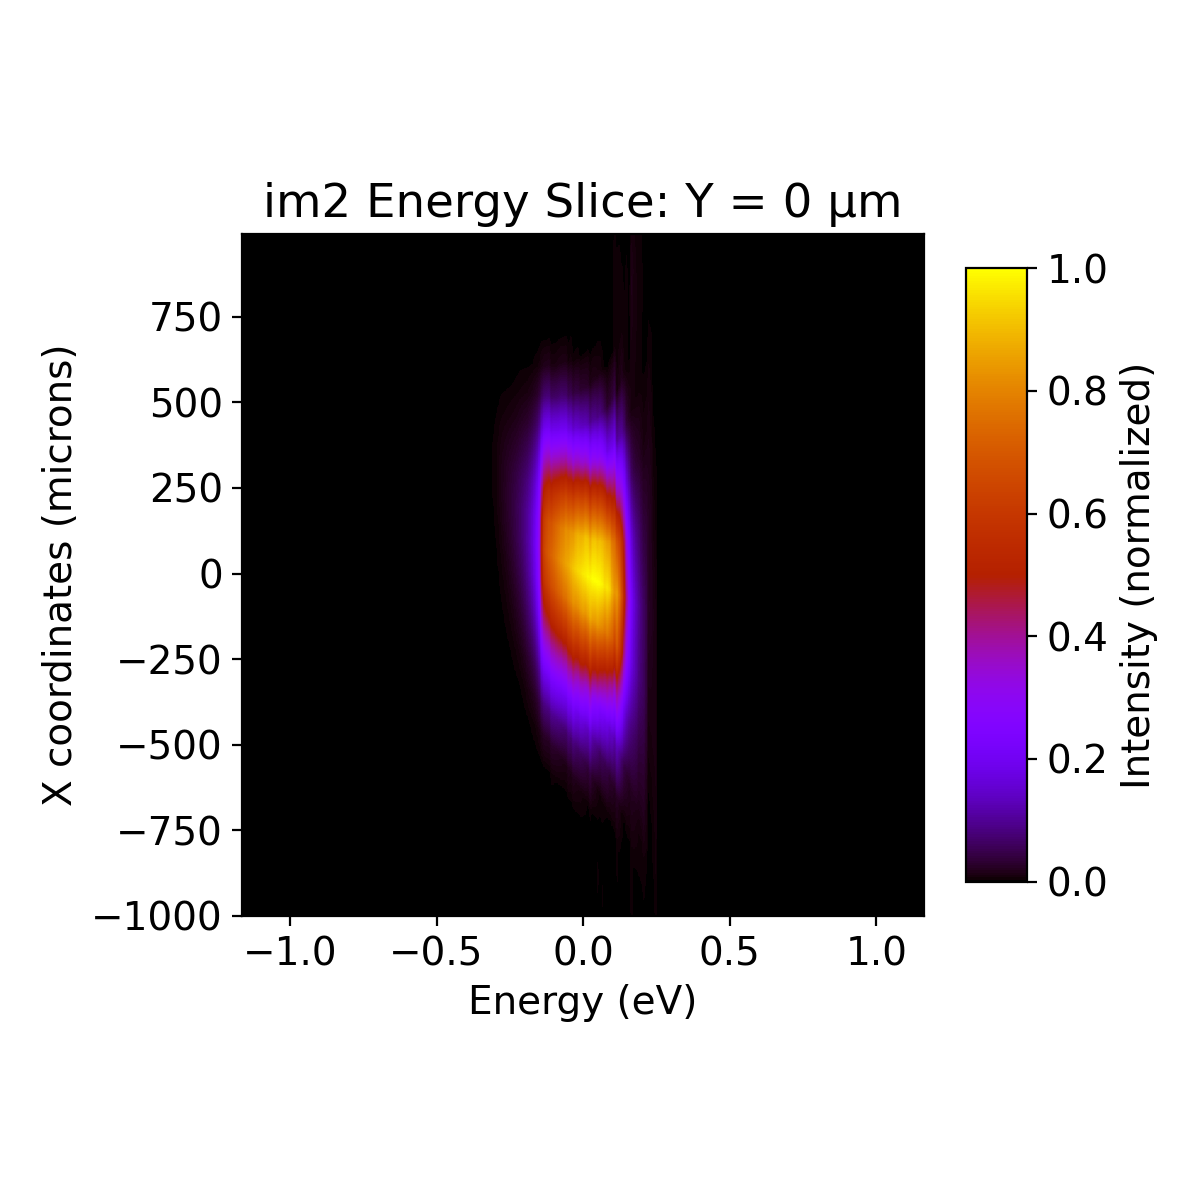

<IPython.core.display.Javascript object>


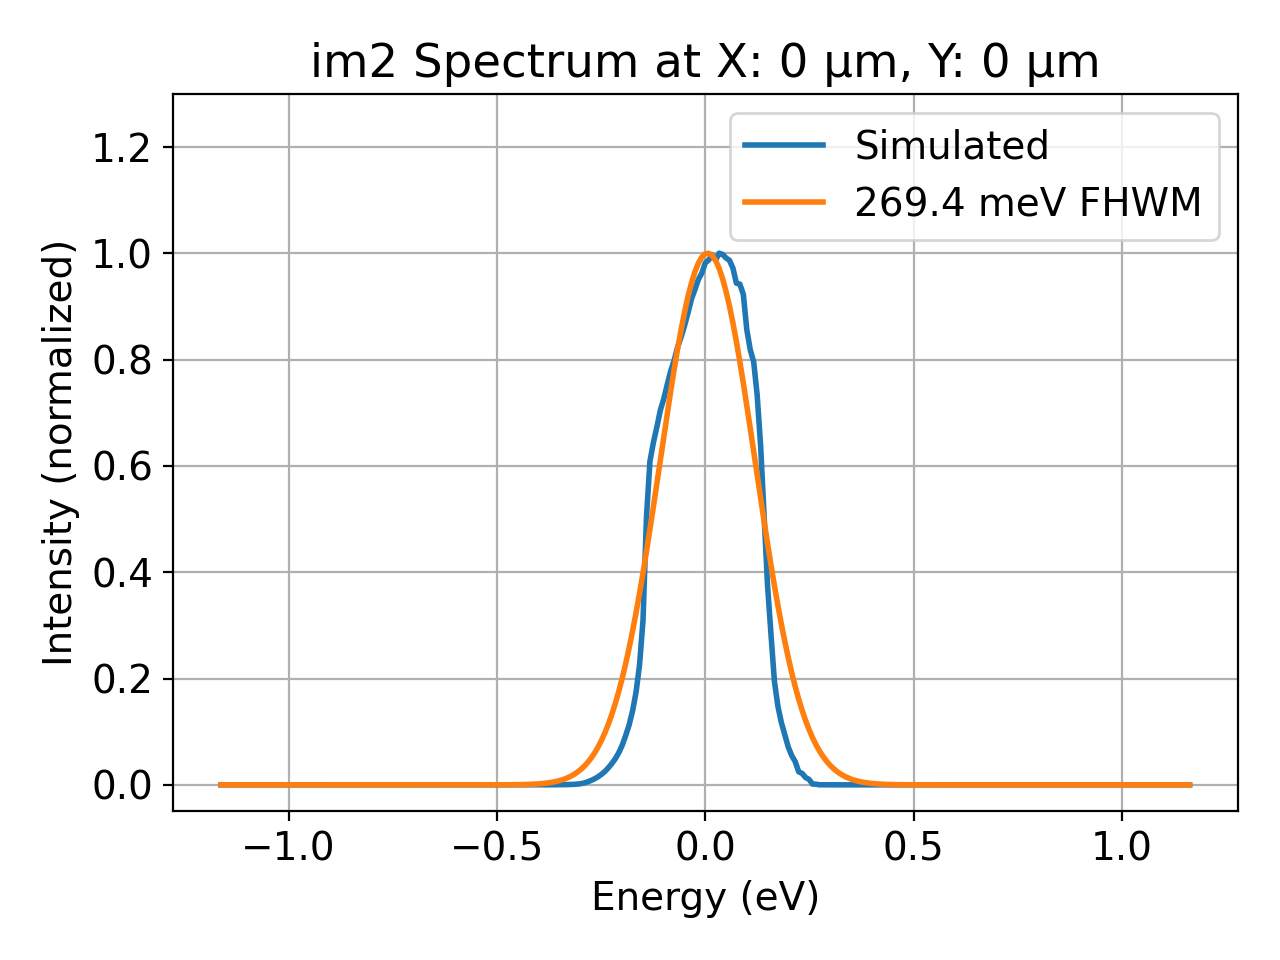

In [39]:
# pulse_test.plot_spectrum('im0')
# pulse_test.plot_spectrum('im1')
# pulse_test.imshow_energy_slice('im1')
pulse_test.imshow_time_slice('im2')
pulse_test.imshow_energy_slice('im2')
pulse_test.plot_spectrum('im2')

In [13]:
1/20

0.05

In [44]:
.8/20

0.04

In [36]:
(.06+.07)/20

0.006500000000000001

<IPython.core.display.Javascript object>


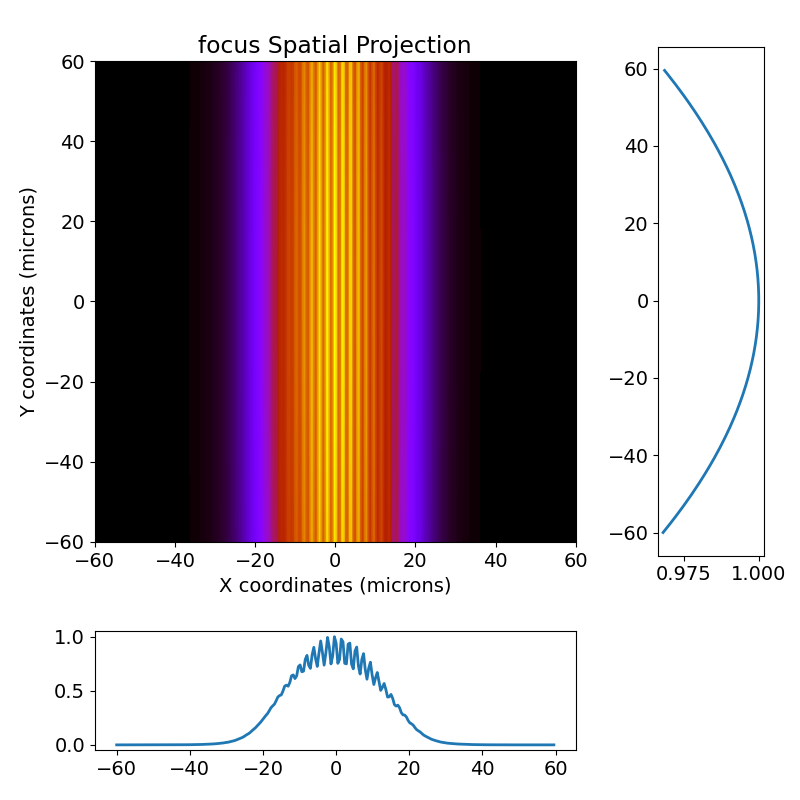

<IPython.core.display.Javascript object>


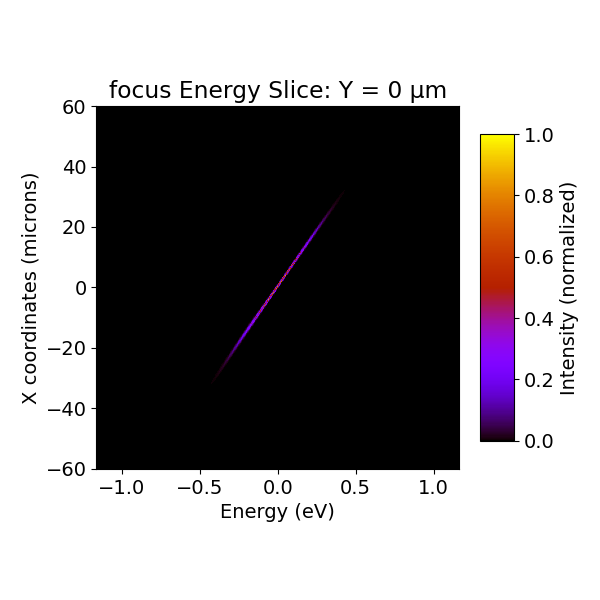

<IPython.core.display.Javascript object>


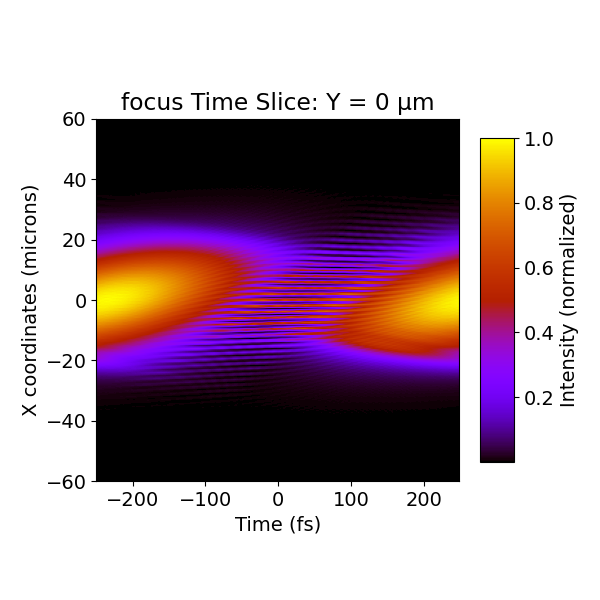

128
Fit failed. Using second moment for width.


<IPython.core.display.Javascript object>


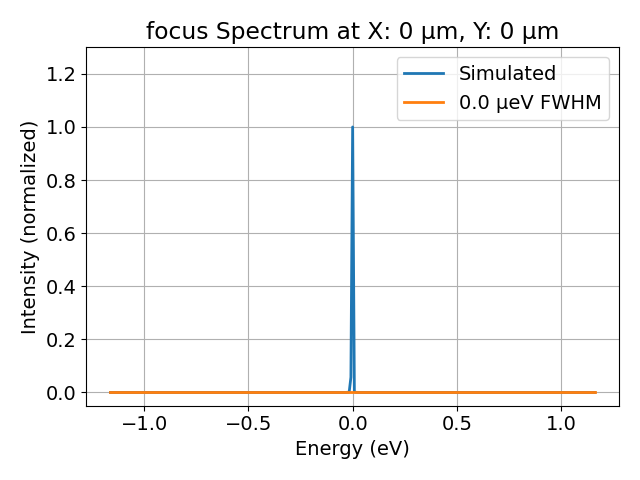

In [54]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Hasan_mono/figures'

pulse_test.imshow_projection('focus')
pulse_test.imshow_energy_slice('focus')
# plt.savefig(figure_path+'/mirror_focus.png')
pulse_test.imshow_time_slice('focus')
plt.tight_layout()
pulse_test.plot_spectrum('focus', x_pos=0)

In [37]:
.4/(12.5-5)

0.05333333333333334